# Company Bankruptcy Prediction
### Task Details
Our top priority in this business problem is to identify companies in bankruptcy.

### Expected Submission
The solution should contain two columns:
1) Row number  
2) Bankruptcy?

### Evaluation
Evaluation using F1-Score.
The F1-Score is defines as the harmonic mean between precision and recall:  
![harmonic-mean](harmonic-mean.png)

## MSDS 422: Practical Machine Learning
### Module 4 Assignment 2: Company Bankruptcy Prediction (Kaggle)
### Requirements
1) Split the training set into an 80% training and 20% validation set and conduct / improve upon previous EDA.  
2) Build at least three models: an SVM, a logistic regression model, a Naïve Bayes model.  
3) Evaluate each of the models’ assumptions.  
4) Conduct hyperparameter tuning for the SVM kernel.  
5) Evaluate goodness of fit metrics including TPR, FPR, precision, recall, and accuracy on the training and validation sets.  
6) Build ROC and Precision/Recall graphs.  
7) Evaluate your models' performance on the validation set using the F1-score.  
  
**Note:** Python `scikit-learn` should be your primary environment for conducting this research.

## Part 1: Data Preparation, Exploration, and Visualization  
I will begin by importing necessary libraries, loading in the data, and starting right away by looking at general information about the data, either through basic statistics or the number of null values.  
**Note:** I will not split the data into train, test sets just yet. Exploration should happen on ALL the available data. I will split the data prior to modeling.

In [1]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import re
import numpy as np
from imblearn.over_sampling import SMOTE
from scipy import stats
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC

# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [2]:
# import data
data = pd.read_csv("data.csv")
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
# store target variable of data in a safe place
y = data[["Bankrupt?"]]

In [4]:
# exploring basic statistics
data.iloc[:, 0:10].describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Insights:** The 75th percentile for the column `Bankrupt` is 0, meaning the vast majority of companies did not go bankrupt. This could be our baseline model -- predicting 0 for all companies. 

In [5]:
data.iloc[:, 10:20].describe()

,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons
count,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000
mean,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.115001,0.190661,0.190633,0.190672,0.228813
std,0.012679,3.237684e+09,2.598292e+09,0.017036,1.082750e+08,0.138667,0.033390,0.033474,0.033480,0.033263
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.781567,1.566874e-04,1.281880e-04,0.461558,2.030203e-04,0.000000,0.173613,0.173613,0.173676,0.214711
50%,0.781635,2.777589e-04,5.090000e+08,0.465080,3.210321e-04,0.073489,0.184400,0.184400,0.184400,0.224544
75%,0.781735,4.145000e+09,3.450000e+09,0.471004,5.325533e-04,0.205841,0.199570,0.199570,0.199612,0.238820
max,1.000000,9.990000e+09,9.980000e+09,1.000000,9.900000e+08,1.000000,1.000000,1.000000,1.000000,1.000000


**Insights:** The columns `Operating Expense Rate`, `Research and development expense rate`, and `Interest-bearing debt interest rate` have extremely large values for the means. Because the values can either be extremely small or large, scaling may be very necessary. Need to look into outliers for these columns. All columns of `Net Value Per Share` have outliers; the 75th percentile for each of these columns barely reach 0.2, but the columns have a maximum value of 1.0. Something similar is happening with the column `Persistent EPS in the Last Four Seasons`.

In [6]:
data.iloc[:, 20:30].describe()

,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate
count,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03
mean,0.323482,1.328641e+06,0.109091,0.184361,0.022408,0.847980,0.689146,0.689150,0.217639,5.508097e+09
std,0.017611,5.170709e+07,0.027942,0.033180,0.012079,0.010752,0.013853,0.013910,0.010063,2.897718e+09
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.317748,1.563138e-02,0.096083,0.170370,0.022065,0.847984,0.689270,0.689270,0.217580,4.860000e+09
50%,0.322487,2.737571e-02,0.104226,0.179709,0.022102,0.848044,0.689439,0.689439,0.217598,6.400000e+09
75%,0.328623,4.635722e-02,0.116155,0.193493,0.022153,0.848123,0.689647,0.689647,0.217622,7.390000e+09
max,1.000000,3.020000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.990000e+09


**Insights:** `Total Asset Growth Rate` has extremely large values.

In [7]:
data.iloc[:, 30:40].describe()

,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A)
count,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000
mean,1.566212e+06,0.264248,0.379677,4.032850e+05,8.376595e+06,0.630991,4.416337e+06,0.113177,0.886823,0.008783
std,1.141594e+08,0.009634,0.020737,3.330216e+07,2.446847e+08,0.011238,1.684069e+08,0.053920,0.053920,0.028153
min,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,4.409689e-04,0.263759,0.374749,7.555047e-03,4.725903e-03,0.630612,3.007049e-03,0.072891,0.851196,0.005244
50%,4.619555e-04,0.264050,0.380425,1.058717e-02,7.412472e-03,0.630698,5.546284e-03,0.111407,0.888593,0.005665
75%,4.993621e-04,0.264388,0.386731,1.626953e-02,1.224911e-02,0.631125,9.273293e-03,0.148804,0.927109,0.006847
max,9.330000e+09,1.000000,1.000000,2.750000e+09,9.230000e+09,1.000000,9.940000e+09,1.000000,1.000000,1.000000


In [8]:
data.iloc[:, 40:50].describe()

,Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03
mean,0.374654,0.005968,0.108977,0.182715,0.402459,0.141606,1.278971e+07,9.826221e+06,2.149106e+09,1.008596e+09
std,0.016286,0.012188,0.027782,0.030785,0.013324,0.101145,2.782598e+08,2.563589e+08,3.247967e+09,2.477557e+09
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.370168,0.005366,0.096105,0.169376,0.397403,0.076462,7.101336e-04,4.386530e-03,1.728256e-04,2.330013e-04
50%,0.372624,0.005366,0.104133,0.178456,0.400131,0.118441,9.678107e-04,6.572537e-03,7.646743e-04,5.930942e-04
75%,0.376271,0.005764,0.115927,0.191607,0.404551,0.176912,1.454759e-03,8.972876e-03,4.620000e+09,3.652371e-03
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.740000e+09,9.730000e+09,9.990000e+09,9.990000e+09


In [9]:
data.iloc[:, 50:60].describe()

,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability
count,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03
mean,0.038595,2.325854e+06,0.400671,1.125579e+07,0.814125,0.400132,0.522273,0.124095,3.592902e+06,3.715999e+07
std,0.036680,1.366327e+08,0.032720,2.945063e+08,0.059054,0.201998,0.218112,0.139251,1.716209e+08,5.103509e+08
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,0.021774,1.043285e-02,0.392438,4.120529e-03,0.774309,0.241973,0.352845,0.033543,5.239776e-03,1.973008e-03
50%,0.029516,1.861551e-02,0.395898,7.844373e-03,0.810275,0.386451,0.514830,0.074887,7.908898e-03,4.903886e-03
75%,0.042903,3.585477e-02,0.401851,1.502031e-02,0.850383,0.540594,0.689051,0.161073,1.295091e-02,1.280557e-02
max,1.000000,8.810000e+09,1.000000,9.570000e+09,1.000000,1.000000,1.000000,1.000000,8.820000e+09,9.650000e+09


In [10]:
data.iloc[:, 60:70].describe()

,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense
count,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000
mean,0.090673,0.353828,0.277395,5.580680e+07,0.761599,0.735817,0.331410,5.416004e+07,0.934733,0.002549
std,0.050290,0.035147,0.010469,5.820516e+08,0.206677,0.011678,0.013488,5.702706e+08,0.025564,0.012093
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.053301,0.341023,0.277034,3.163148e-03,0.626981,0.733612,0.328096,0.000000e+00,0.931097,0.002236
50%,0.082705,0.348597,0.277178,6.497335e-03,0.806881,0.736013,0.329685,1.974619e-03,0.937672,0.002336
75%,0.119523,0.360915,0.277429,1.114677e-02,0.942027,0.738560,0.332322,9.005946e-03,0.944811,0.002492
max,1.000000,1.000000,1.000000,9.910000e+09,1.000000,1.000000,1.000000,9.540000e+09,1.000000,1.000000


In [11]:
data.iloc[:, 70:80].describe()

,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability
count,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000
mean,0.029184,1.195856e+09,2.163735e+09,0.594006,2.471977e+09,0.671531,1.220121e+06,0.761599,0.331410,0.115645
std,0.027149,2.821161e+09,3.374944e+09,0.008959,2.938623e+09,0.009341,1.007542e+08,0.206677,0.013488,0.019529
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.014567,1.456236e-04,1.417149e-04,0.593934,2.735337e-04,0.671565,8.536037e-02,0.626981,0.328096,0.110933
50%,0.022674,1.987816e-04,2.247728e-04,0.593963,1.080000e+09,0.671574,1.968810e-01,0.806881,0.329685,0.112340
75%,0.035930,4.525945e-04,4.900000e+09,0.594002,4.510000e+09,0.671587,3.722000e-01,0.942027,0.332322,0.117106
max,1.000000,1.000000e+10,1.000000e+10,1.000000,1.000000e+10,1.000000,8.320000e+09,1.000000,1.000000,1.000000


In [12]:
data.iloc[:, 80:90].describe()

,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000
mean,0.649731,0.461849,0.593415,0.315582,0.031506,0.001173,0.807760,1.862942e+07,0.623915,0.607946
std,0.047372,0.029943,0.058561,0.012961,0.030845,0.034234,0.040332,3.764501e+08,0.012290,0.016934
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.633265,0.457116,0.565987,0.312995,0.018034,0.000000,0.796750,9.036205e-04,0.623636,0.600443
50%,0.645366,0.459750,0.593266,0.314953,0.027597,0.000000,0.810619,2.085213e-03,0.623879,0.605998
75%,0.663062,0.464236,0.624769,0.317707,0.038375,0.000000,0.826455,5.269777e-03,0.624168,0.613913
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.820000e+09,1.000000,1.000000


In [13]:
data.iloc[:, 90:].describe()

,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


**Insights:** A quick glance at most of these statistics suggest there is a lot of skewness for quite a few variables. Data visualization can help us to see this. First, let's go through and look at missing values, as well as the data type for each column.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

**Insights:** This gave us some informative leads on the data:  
- The dataset is composed of of 6819 observations for each of our 96 features  
- All of the features are numerical (int64 or float64)  
- There are no missing values (NaN) among the data  
  
Let's make sure that none of the rows are duplicated.

In [15]:
# checking for duplicates
data.duplicated().sum()

0

Great, so all of our data is there, and we don't have to worry about duplicates. The next thing I would like to do is investigate the target variable `Bankrupt?`. Let's create some visualizations and proportions to better understand it.

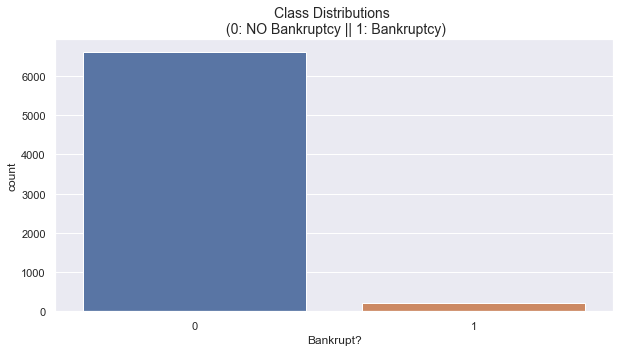

In [16]:
# plotting a count plot for Bankrupt? target variable
plt.figure(figsize = (10,5))
sns.countplot(x="Bankrupt?", data=data)
plt.title('Class Distributions \n (0: NO Bankruptcy || 1: Bankruptcy)', fontsize=14)
plt.show()

In [17]:
print(data['Bankrupt?'].value_counts())
print('-'* 30)

prop_no_bankruptcy = round((len(data.loc[data['Bankrupt?'] == 0]) / len(data)) * 100, 2)
prop_bankruptcy = round((len(data.loc[data['Bankrupt?'] == 1]) / len(data)) * 100, 2)
print(f"Prop of Companies that DID NOT Bankruptcy: {prop_no_bankruptcy}% of the dataset")
print(f"Prop of Companies that DID Bankruptcy: {prop_bankruptcy}% of the dataset")

0    6599
1     220
Name: Bankrupt?, dtype: int64
------------------------------
Prop of Companies that DID NOT Bankruptcy: 96.77% of the dataset
Prop of Companies that DID Bankruptcy: 3.23% of the dataset


**Insights:** We can clearly see that the `Bankruptcy` column is heavily skewed. We will need to solve this issue in order to obtain good model performance.    

### Histograms
Before solving the skewness issue for our target variable, let's explore our other variables through visualization. I'll start by creating a function that plots a certain number of histograms for me. I don't want to plot it all in one cell because I cannot understand or read the visualization properly if it is too small.

In [18]:
def plot_histograms(idx, df=data):
    """
    Creates a histogram grid for variables of interest from the data set.
    
    Inputs:
        idx: int, the starting index
        
    Outputs:
        Histogram grid for variables of interest.
    """
    max_idx = idx + 12
    
    # we only have 96 features
    if max_idx >= 96:
        max_idx = 95
    
    df.iloc[:, idx:max_idx].hist(figsize = (25,15), bins = 50)
    plt.show()

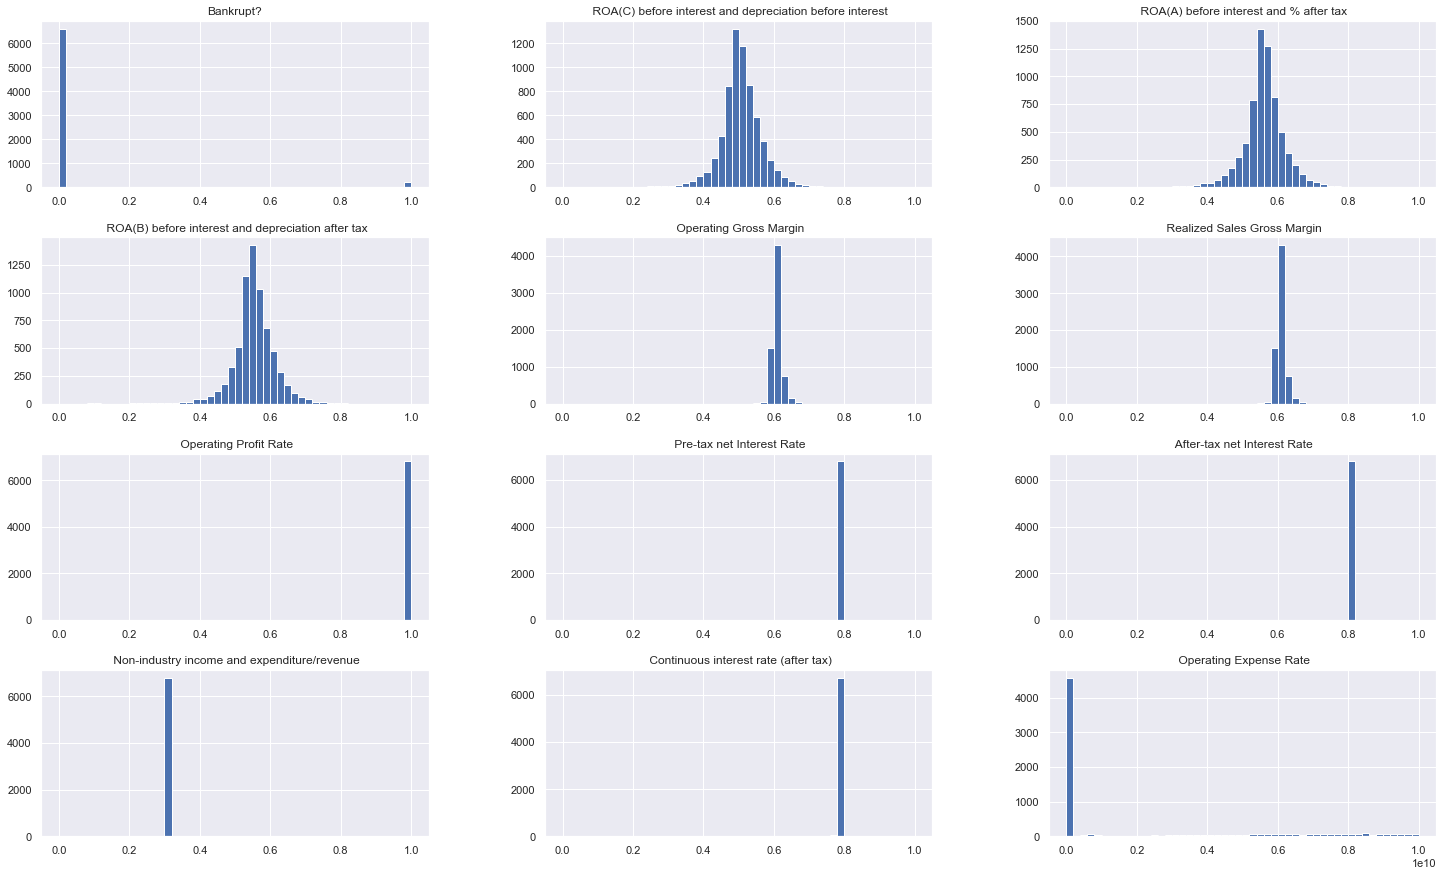

In [19]:
plot_histograms(0)

In [20]:
data[" Operating Profit Rate"].value_counts(bins=4)

(0.75, 1.0]       6817
(0.5, 0.75]          1
(-0.002, 0.25]       1
(0.25, 0.5]          0
Name:  Operating Profit Rate, dtype: int64

**Insights:** Some columns, like the ROA columns, have a normal distribution, while columns like `Operating Profit Rate` are heavily skewed, which we can tell from the `value_counts` cell above.

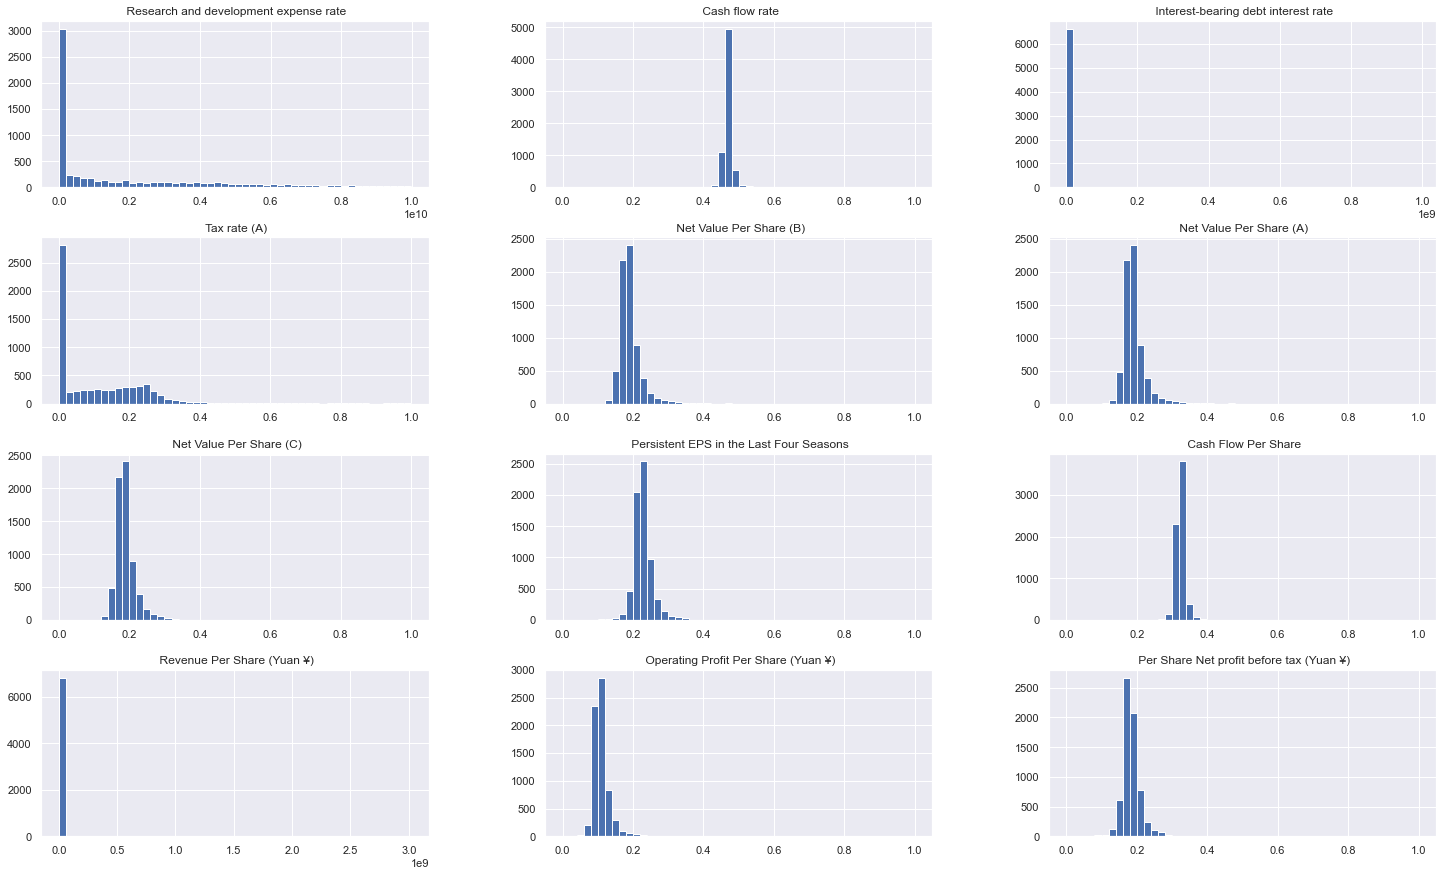

In [21]:
plot_histograms(12)

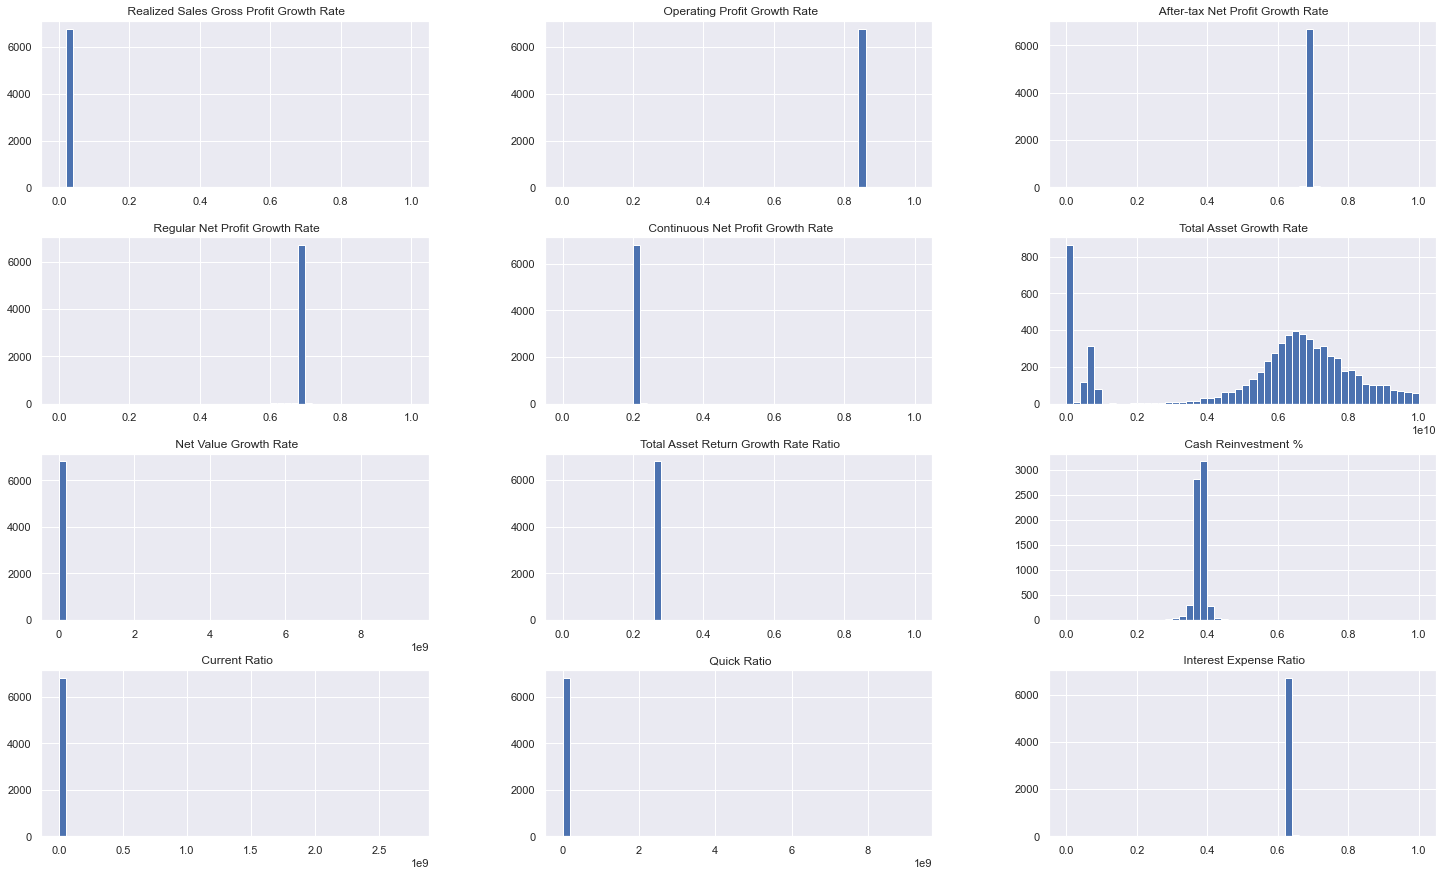

In [22]:
plot_histograms(24)

**Insights:** The columnn `Total Asset Growth Rate` is a multimodal distribution; we will need to consider how to work with this.

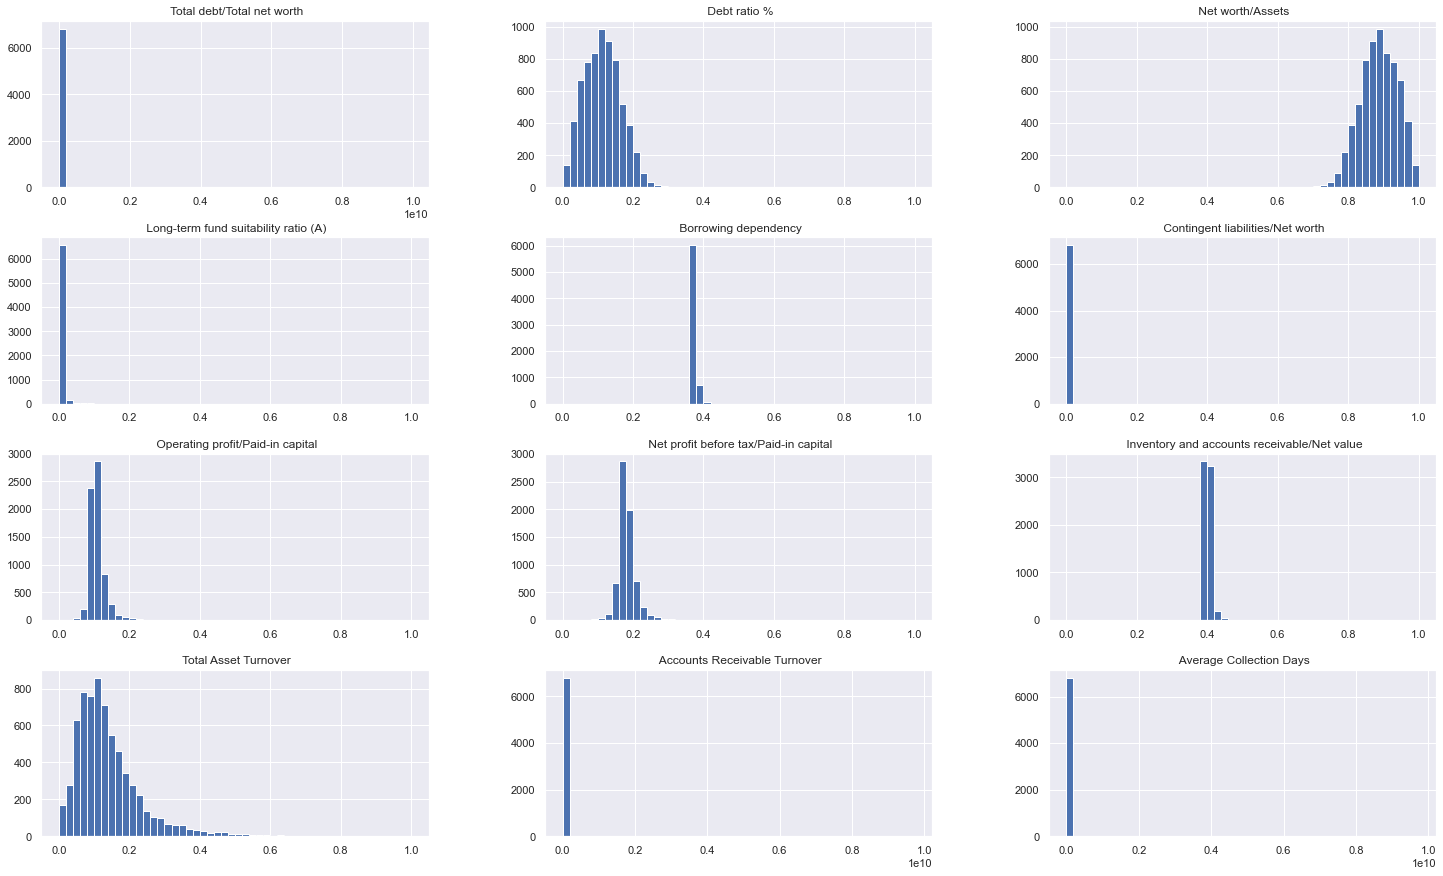

In [23]:
plot_histograms(36)

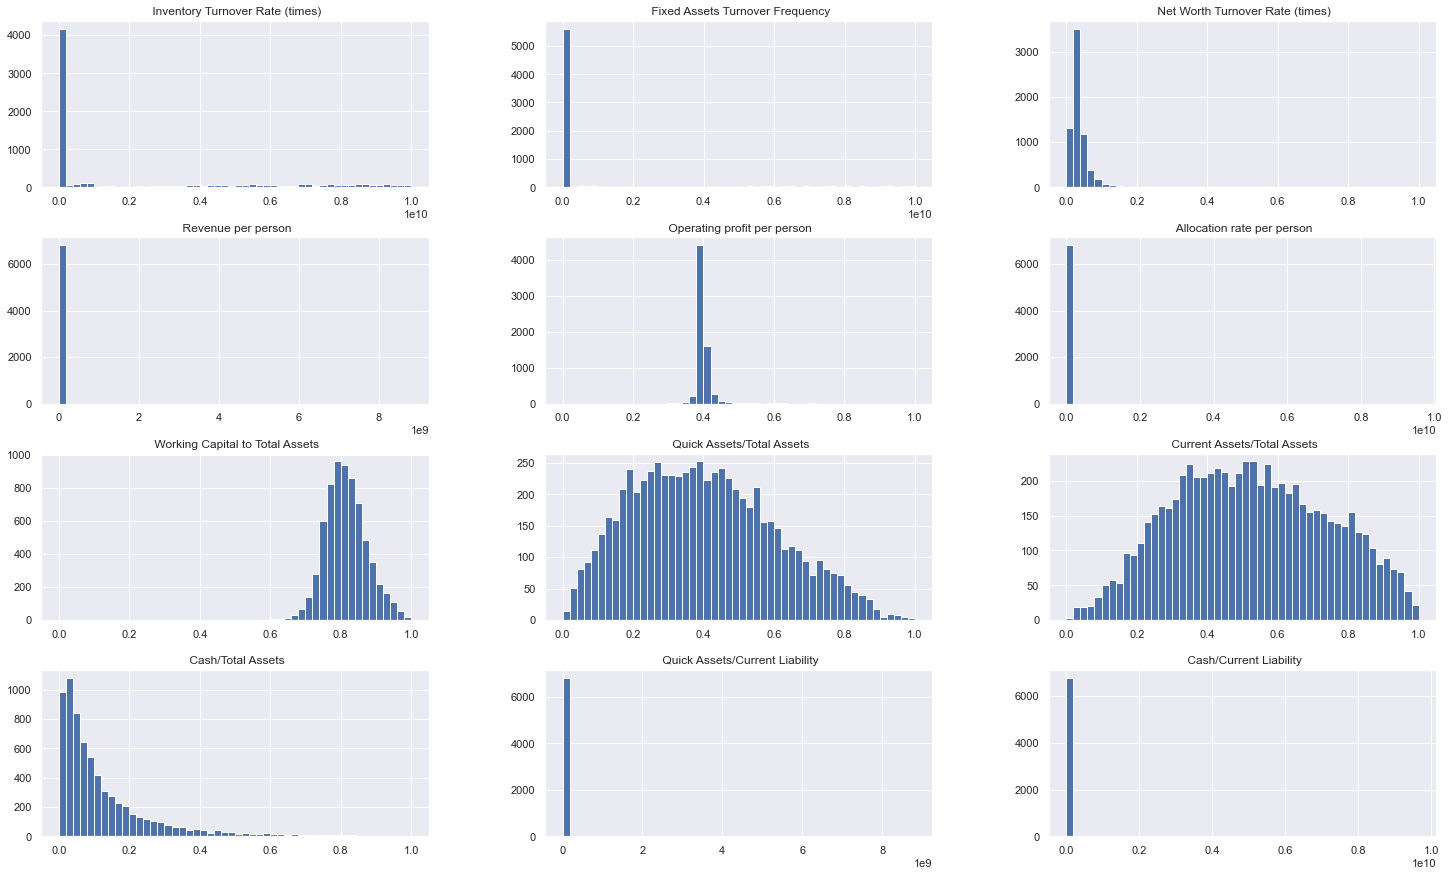

In [24]:
plot_histograms(48)

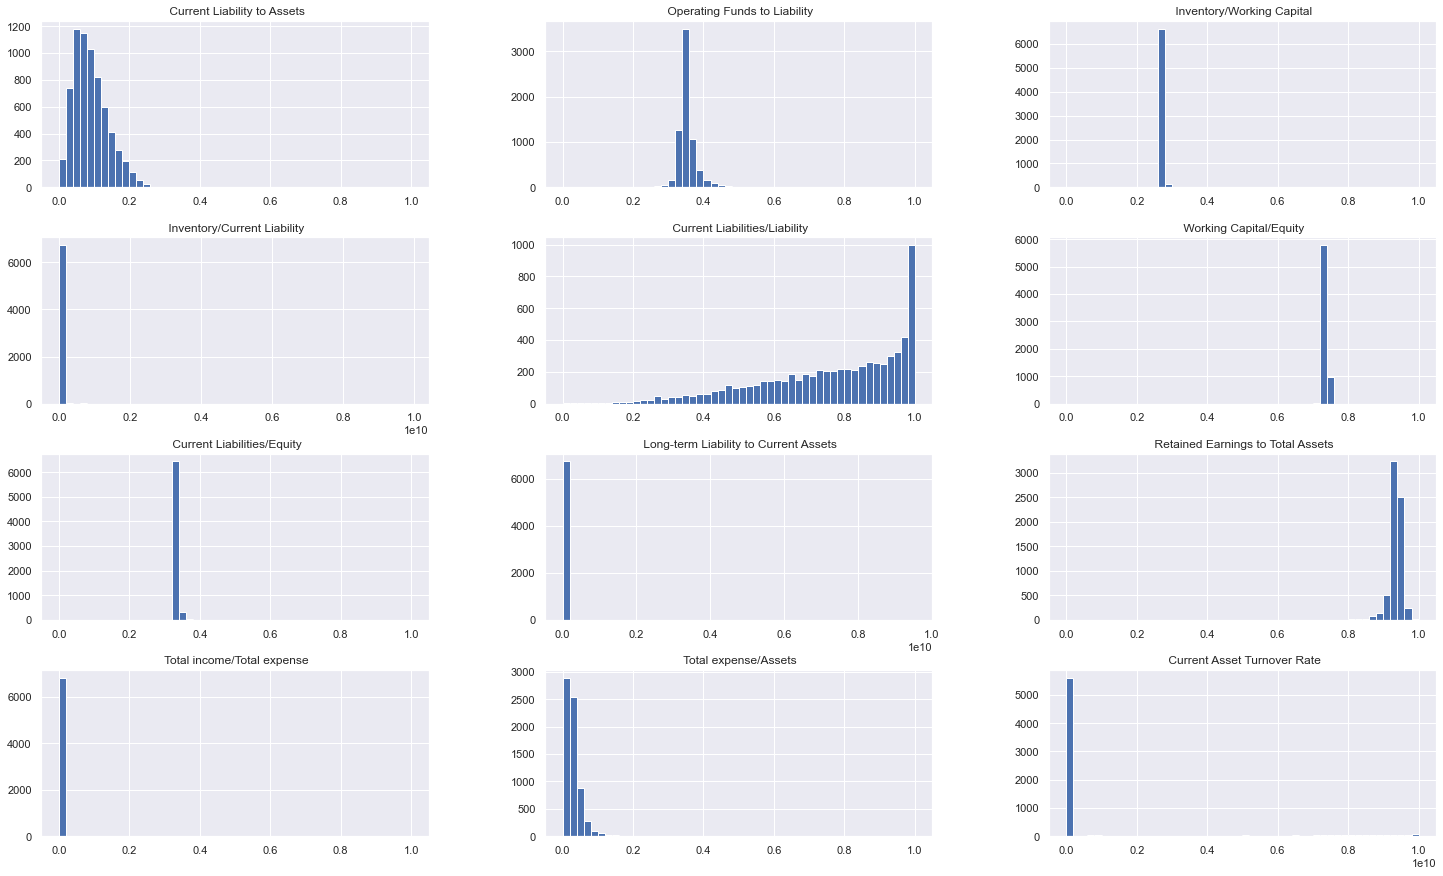

In [25]:
plot_histograms(60)

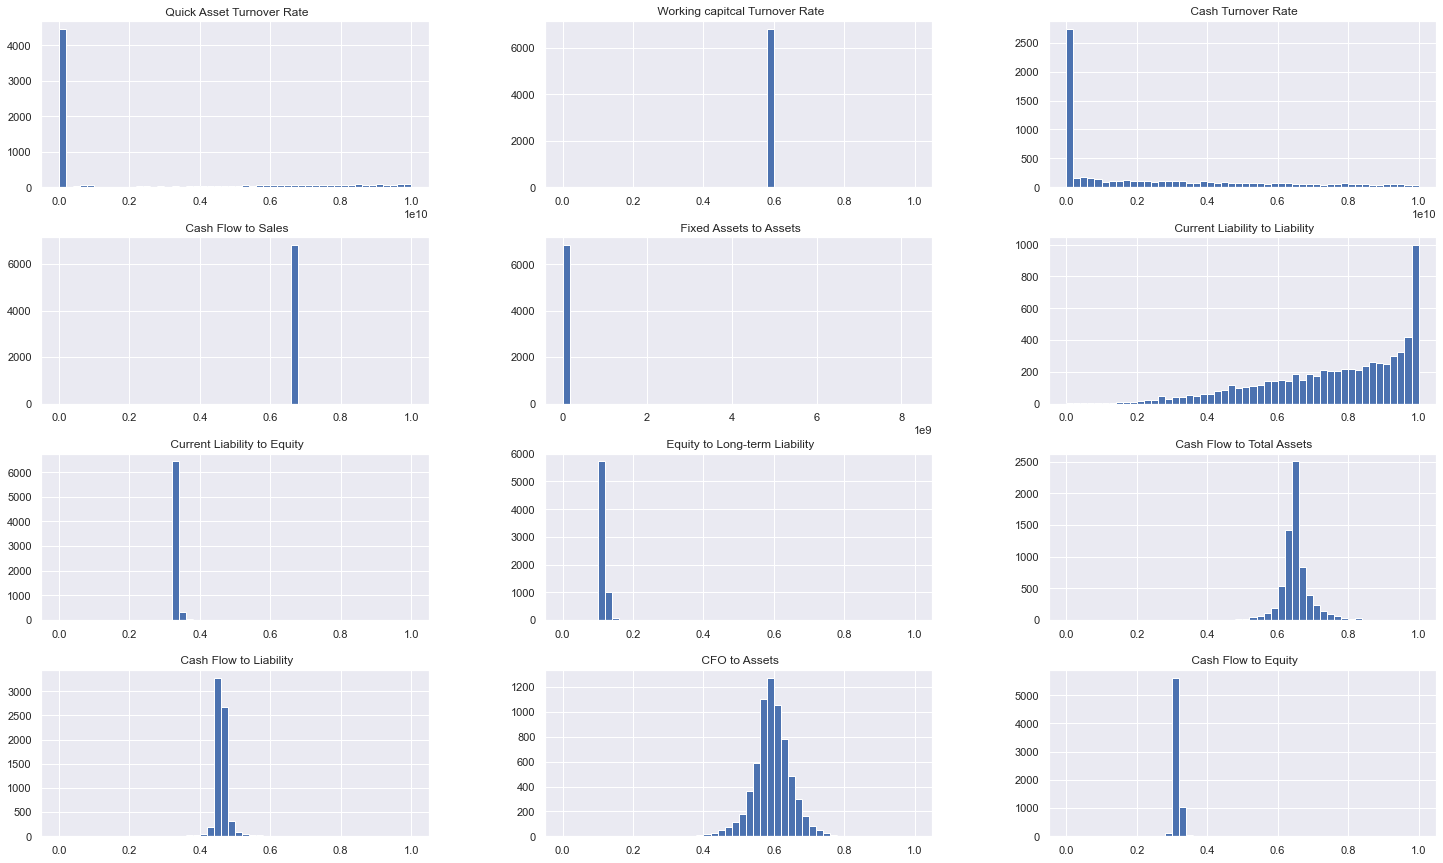

In [26]:
plot_histograms(72)

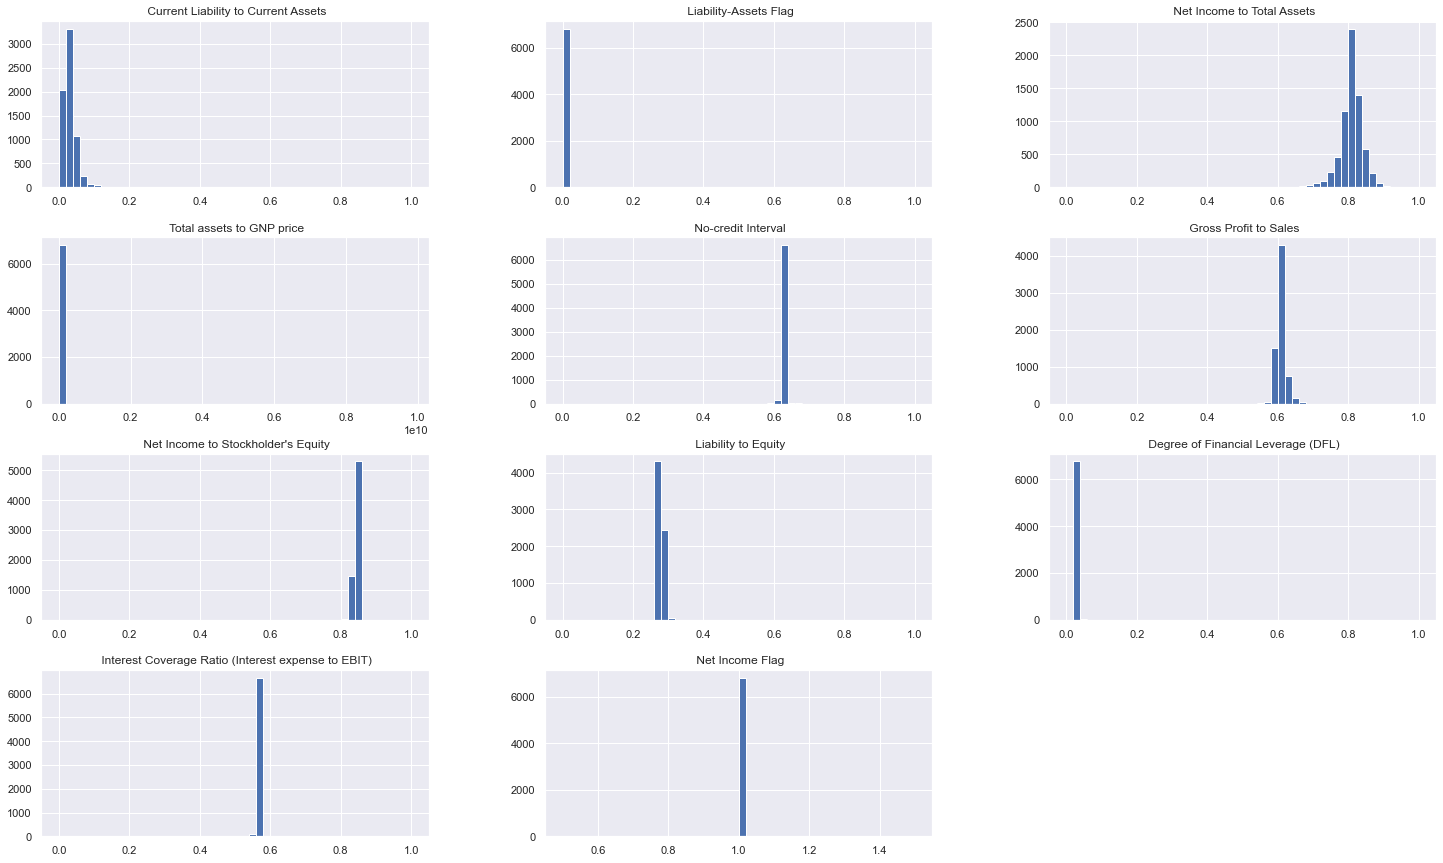

In [27]:
plot_histograms(84)

### Correlation Heatmap
This is a quick and easy way to show some strong linear associations (either positive or negative) between numerical variables. Since ALL of our variables are numerical in this data set except for the target variable, this is an extremely useful visualization to get an idea of the strength of these associations (if any exists).

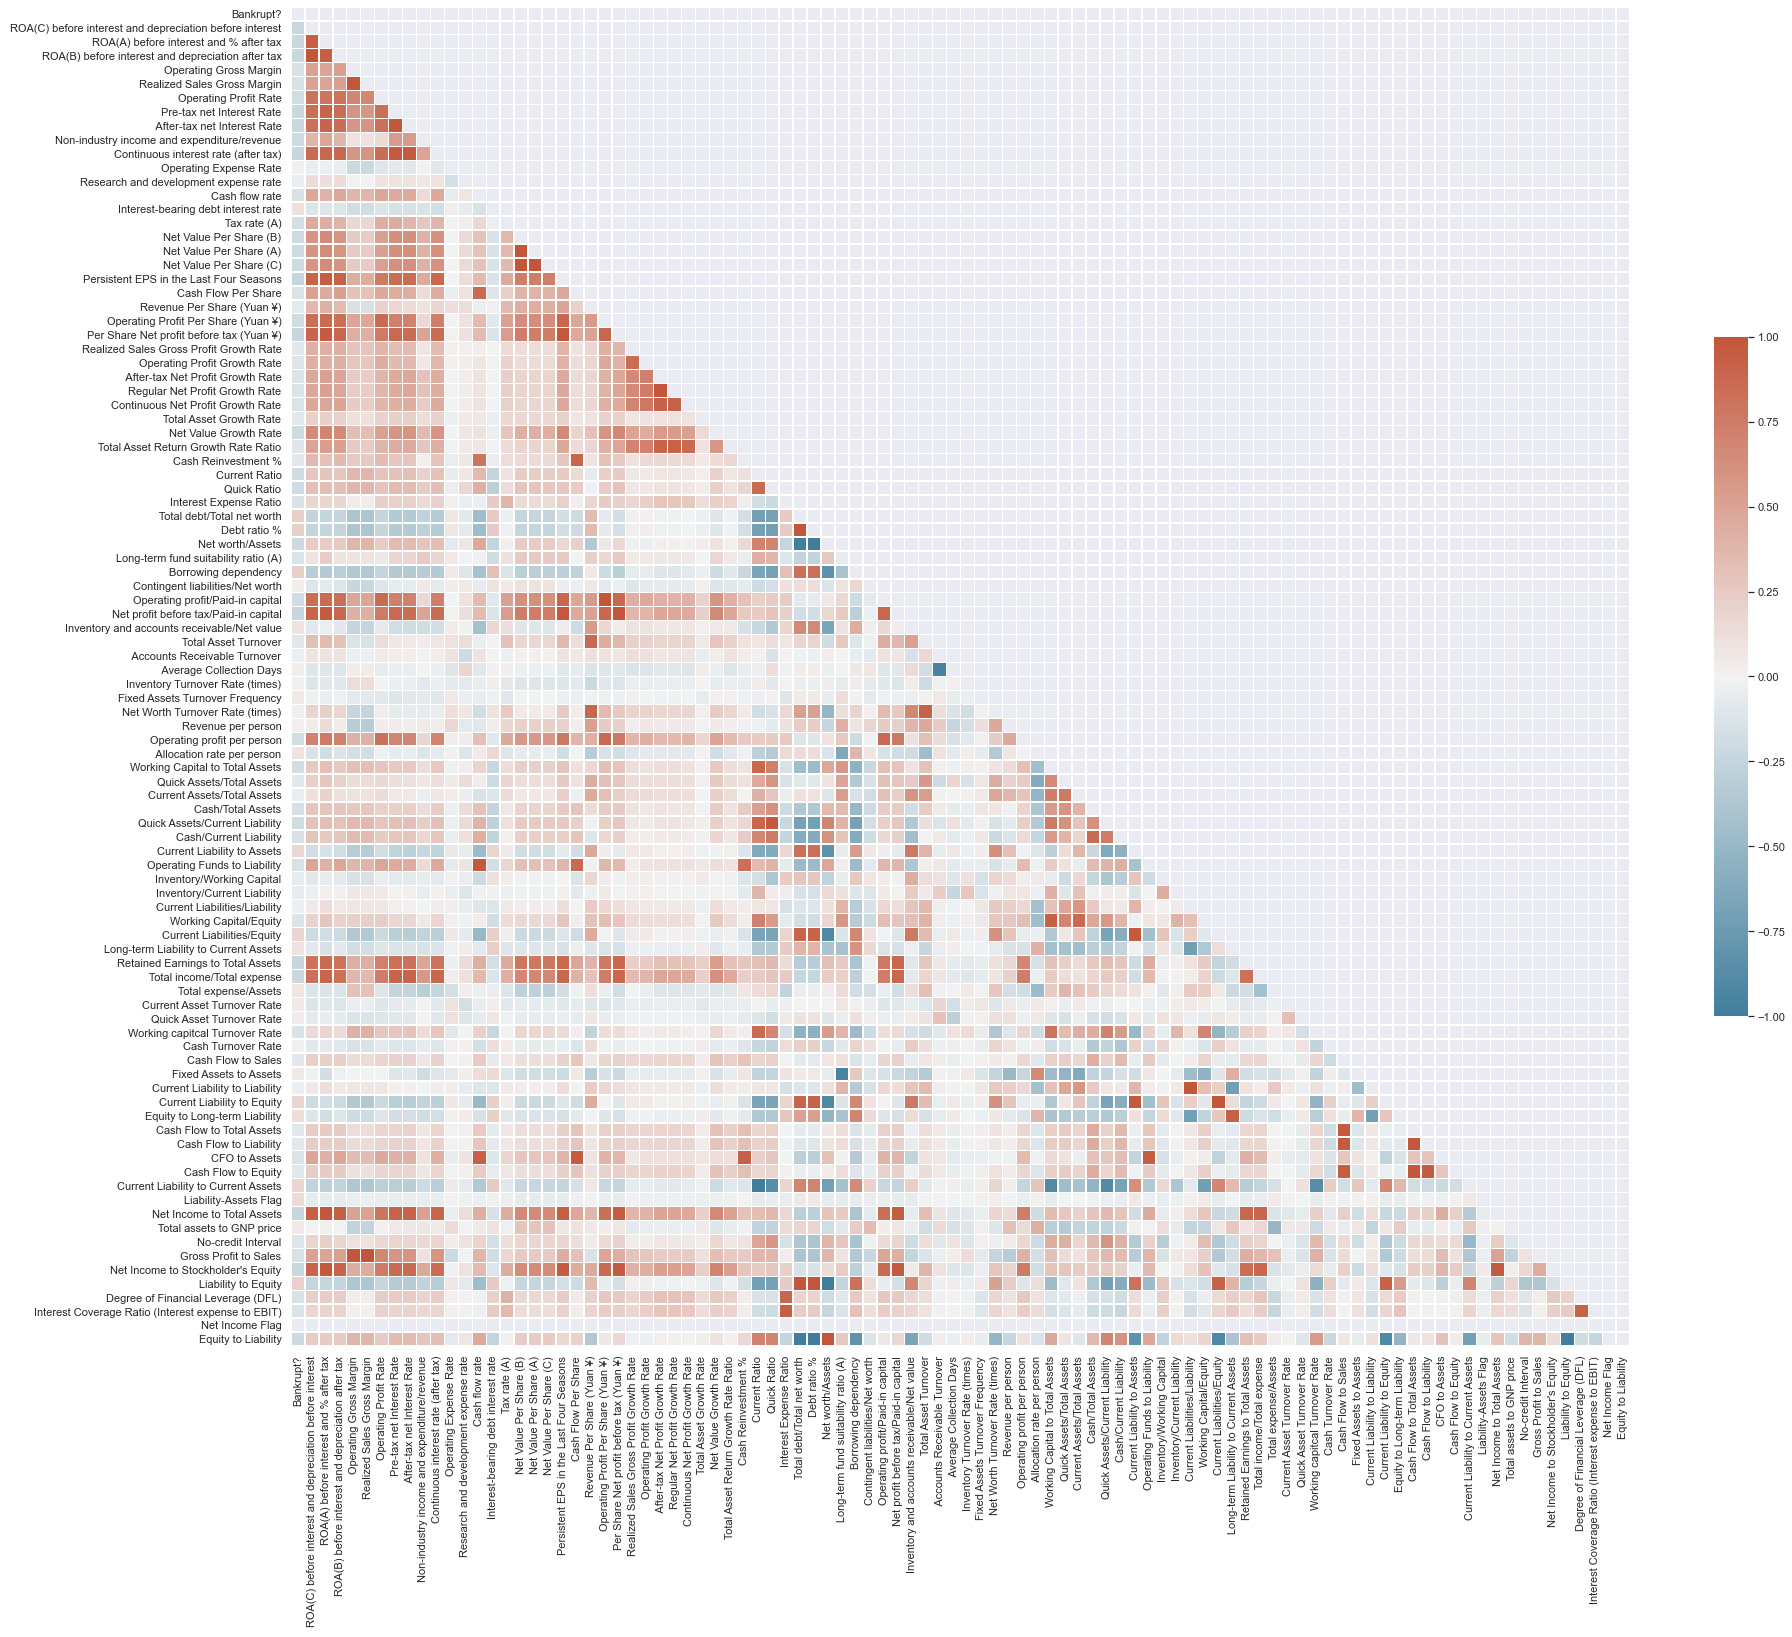

In [28]:
# Correlation Heatmap (Spearman)

fig, ax = plt.subplots(figsize=(30, 25))
mat = data.corr('spearman')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0,# annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

**Insights:** The correlelogram provides an idea that many variables have strong correlations, and many also have absolutely no correlation.

### Boxplots
Similar to the histogram section, I will create a function that plots boxplots for our numerical variables. Because the target variable is binary, I am going to already add it as a `class` in the boxplots to see differences. 

In [29]:
def plot_boxplots(idx, df=data):
    """
    Creates a boxplot grid for variables of interest from the data set with the differentiating class as "Bankrupt?". 
    
    Inputs:
        idx: int, the starting index
        
    Outputs:
        Histogram grid for variables of interest.
    """
    fig, axes = plt.subplots(4, 3, figsize=(25, 15))
    fig.suptitle('Boxplots of Variables')
    df_cols = df.columns.to_list()
    for i in np.arange(0, 4):
        for j in np.arange(0, 3):
            # We only have a total of 96 columns
            if idx >= 96:
                return
            col = df_cols[idx]
            
            # Changing to an array for easy plotting
            col_data = np.array(df[col].tolist())
            sns.boxplot(ax=axes[i,j], x=col_data, data=df)
            axes[i,j].set_xlabel(col)
            idx += 1
    plt.show()

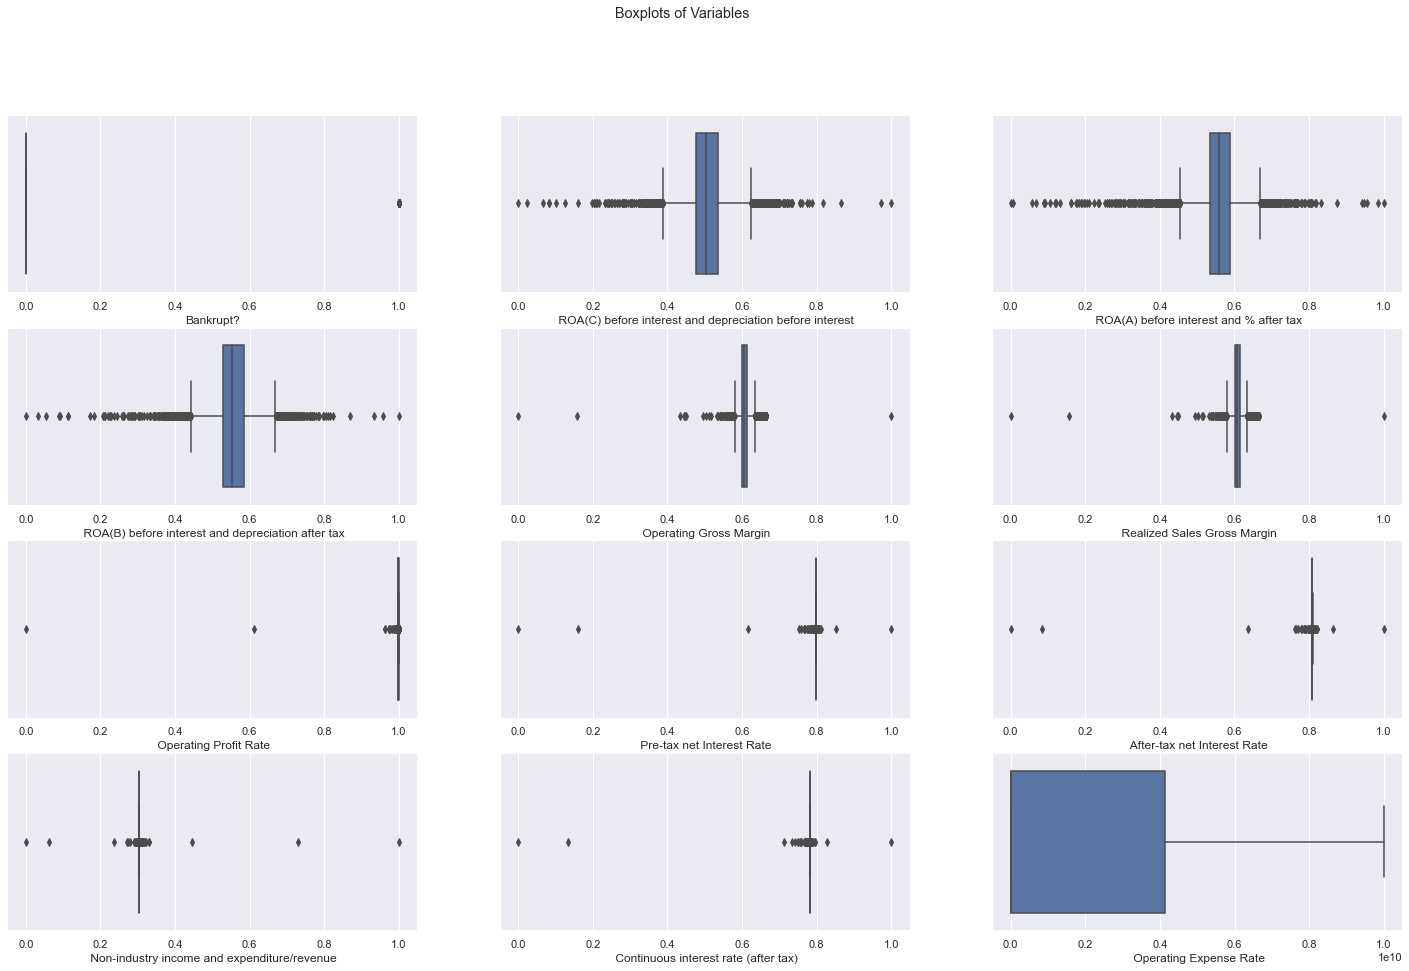

In [30]:
plot_boxplots(0)

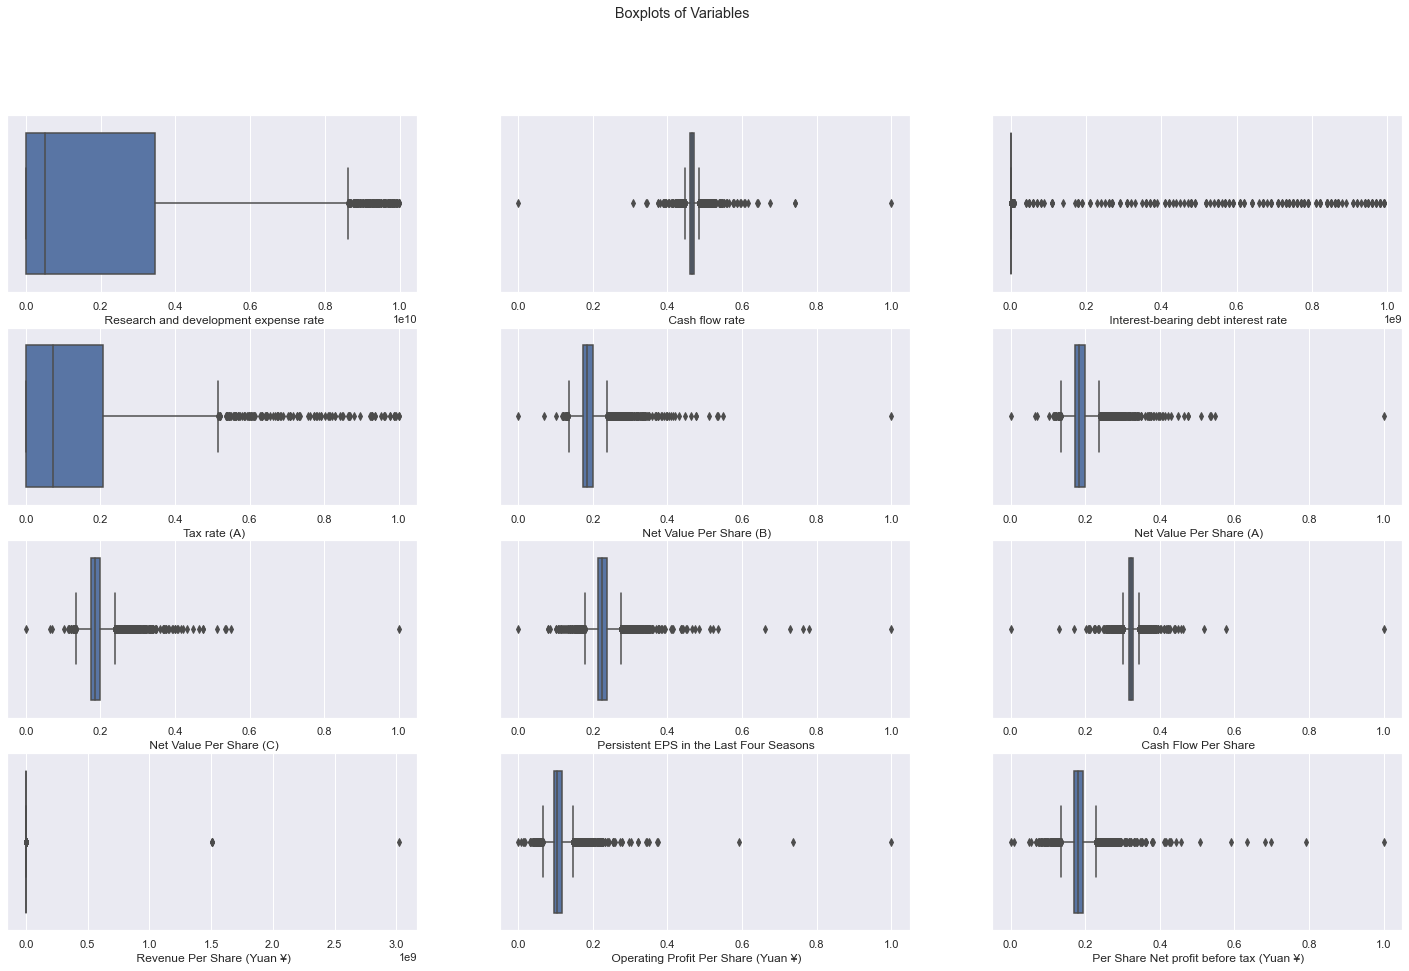

In [31]:
plot_boxplots(12)

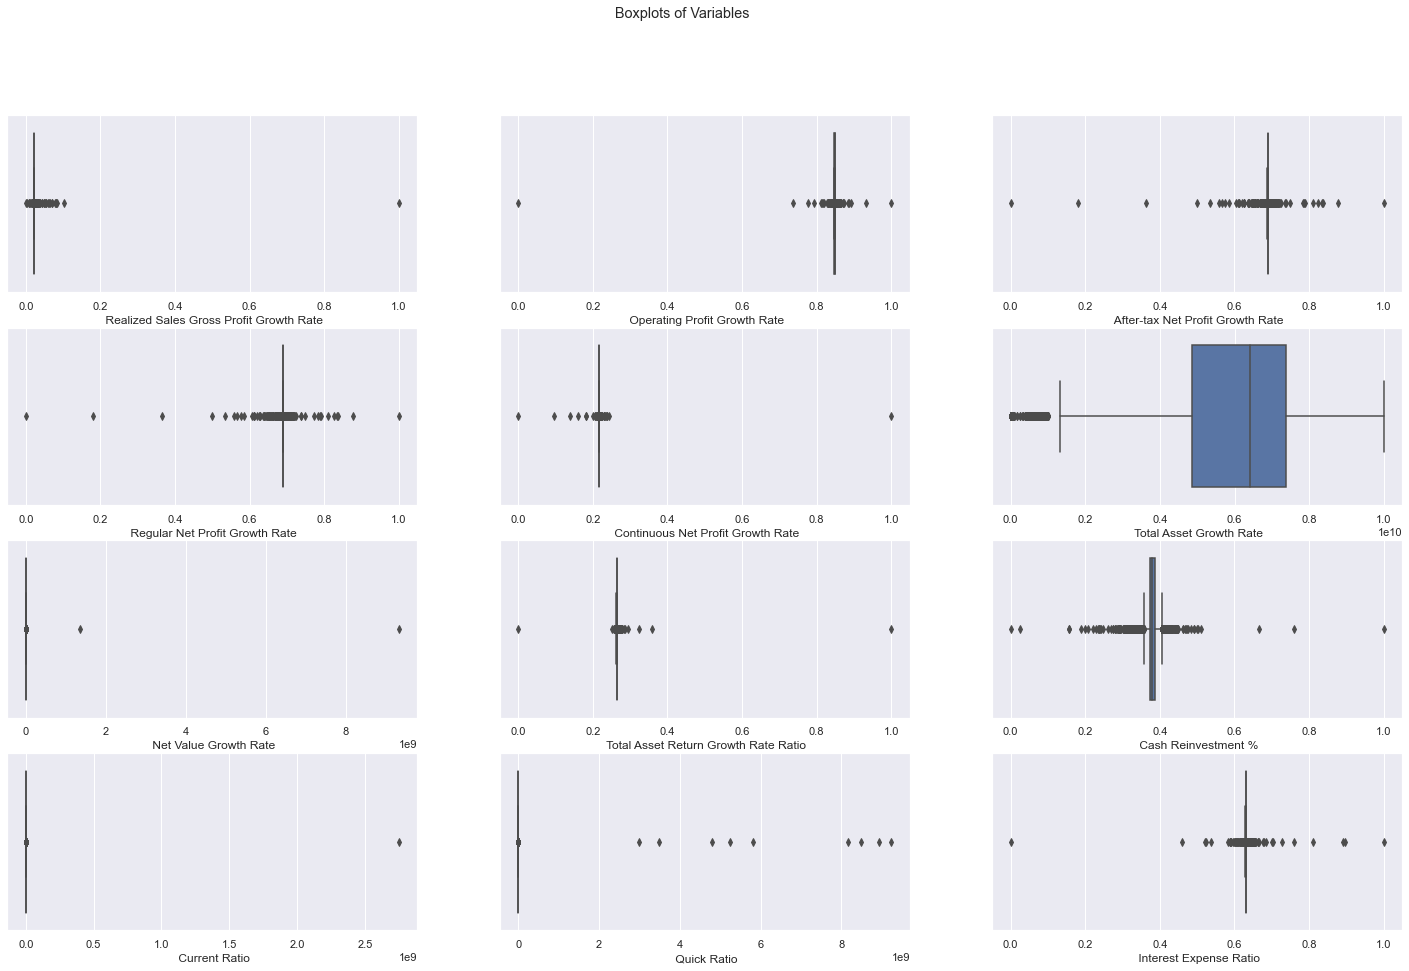

In [32]:
plot_boxplots(24)

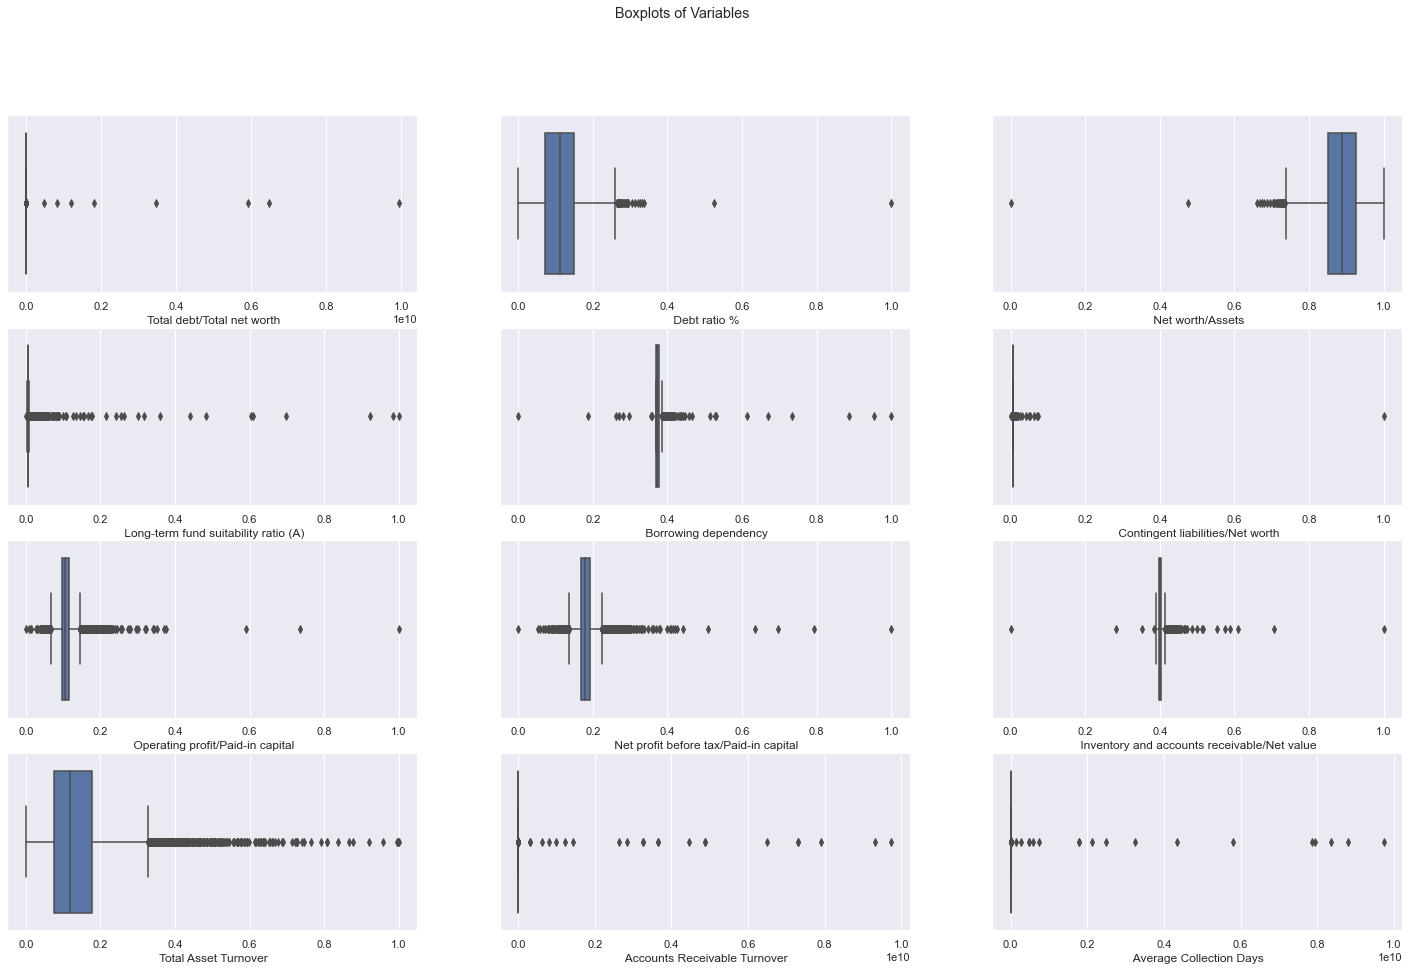

In [33]:
plot_boxplots(36)

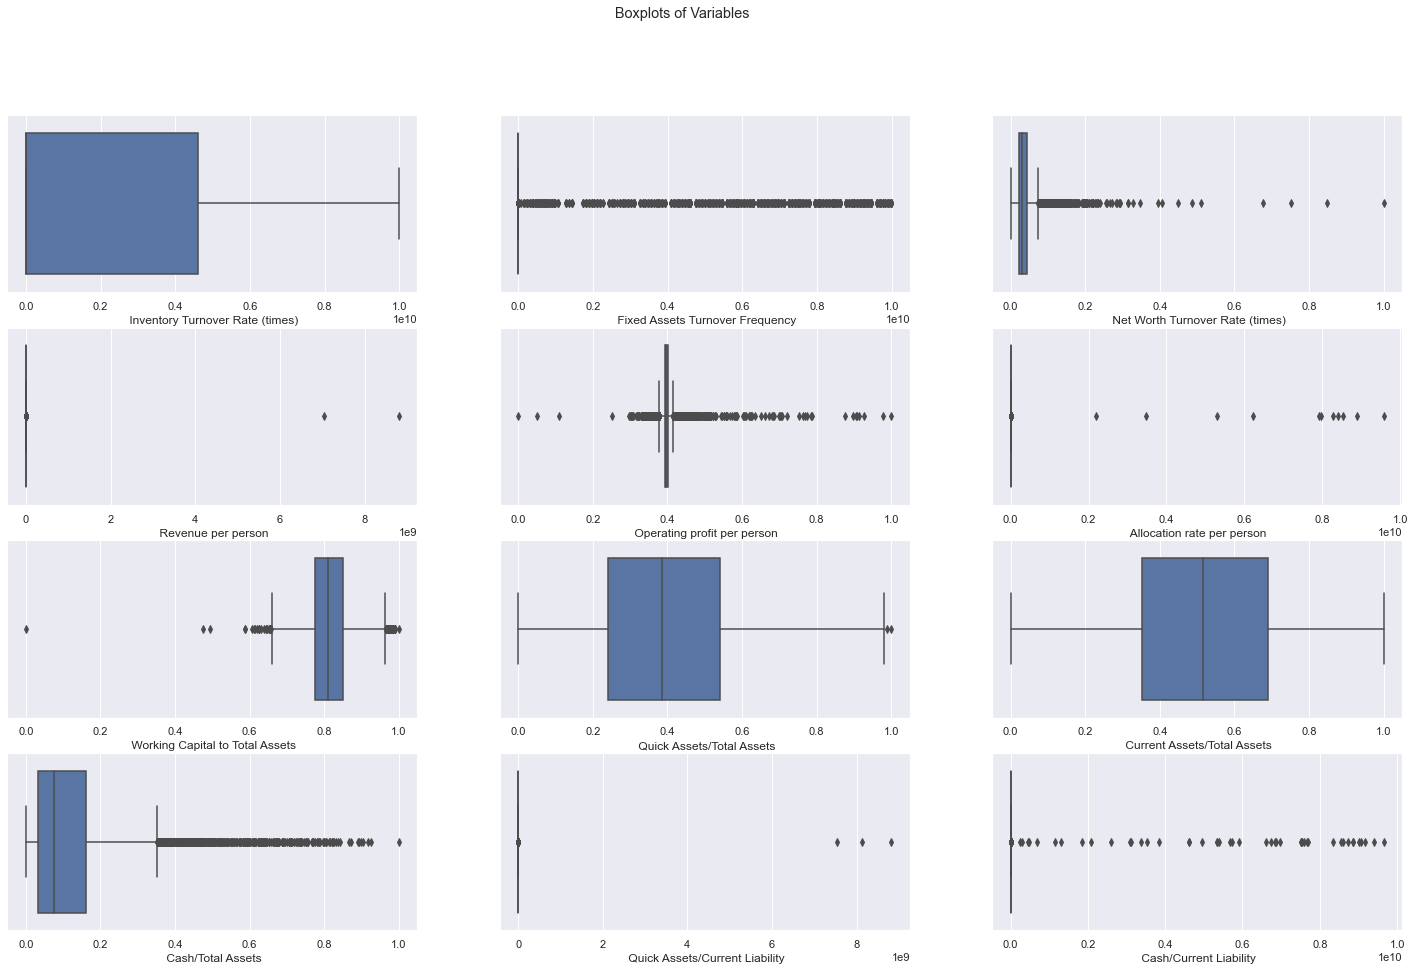

In [34]:
plot_boxplots(48)

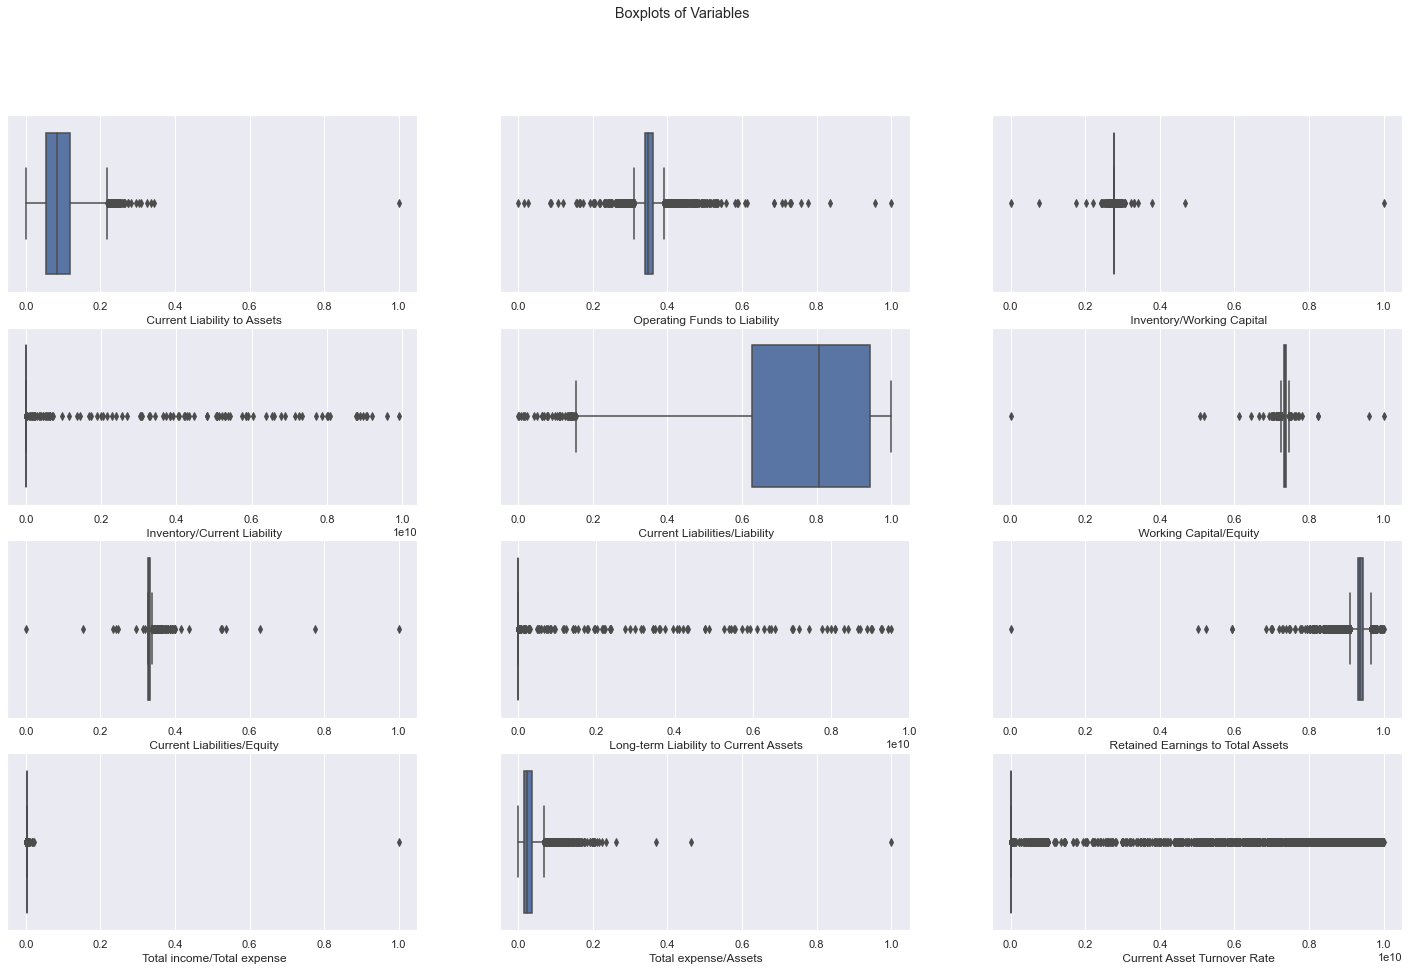

In [35]:
plot_boxplots(60)

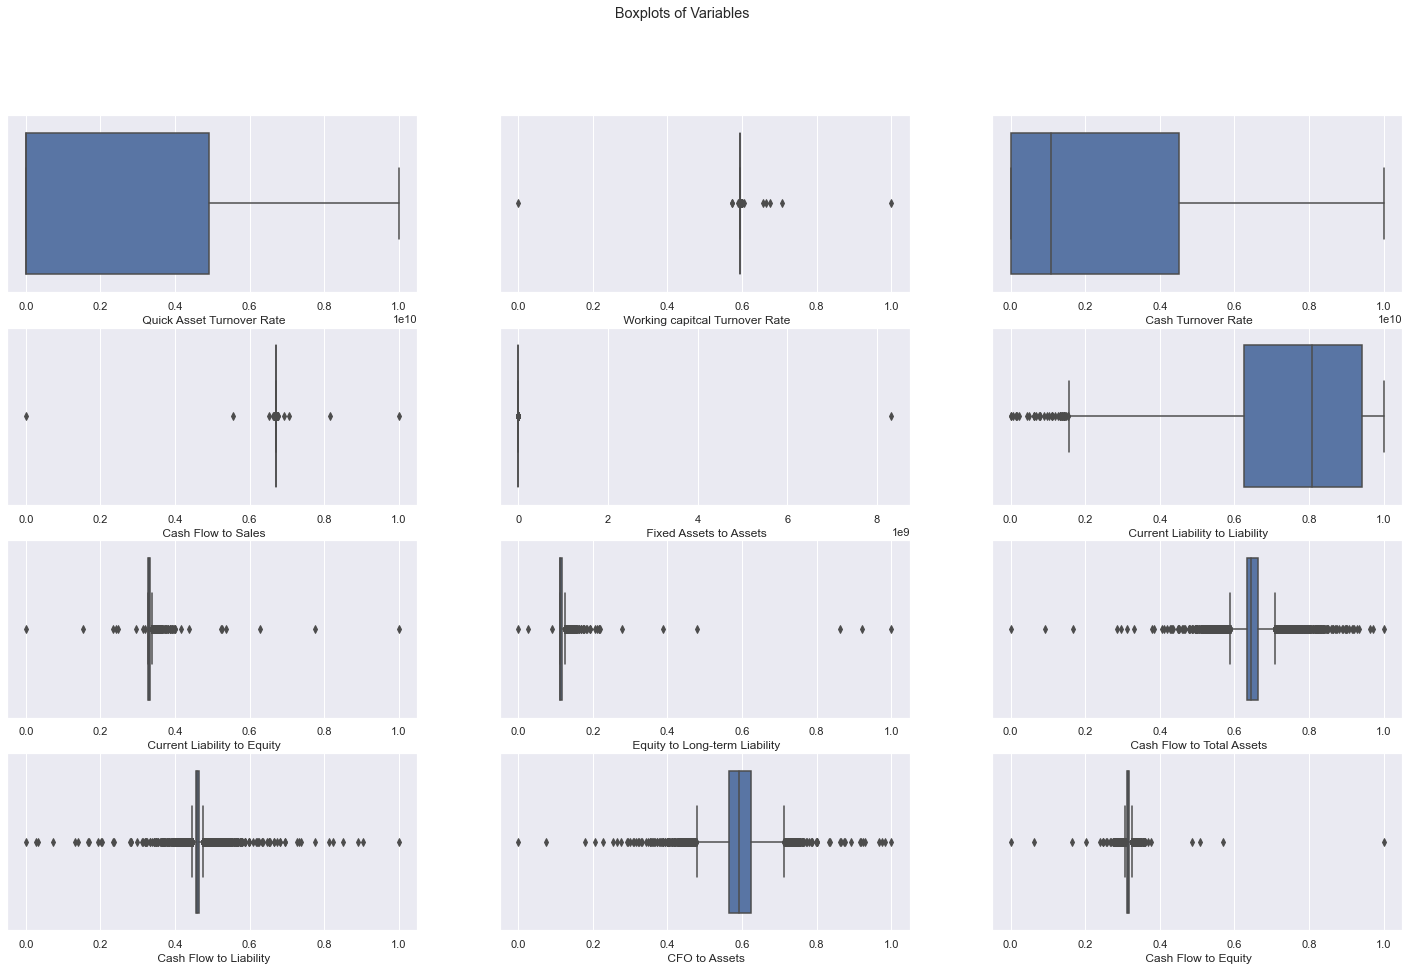

In [36]:
plot_boxplots(72)

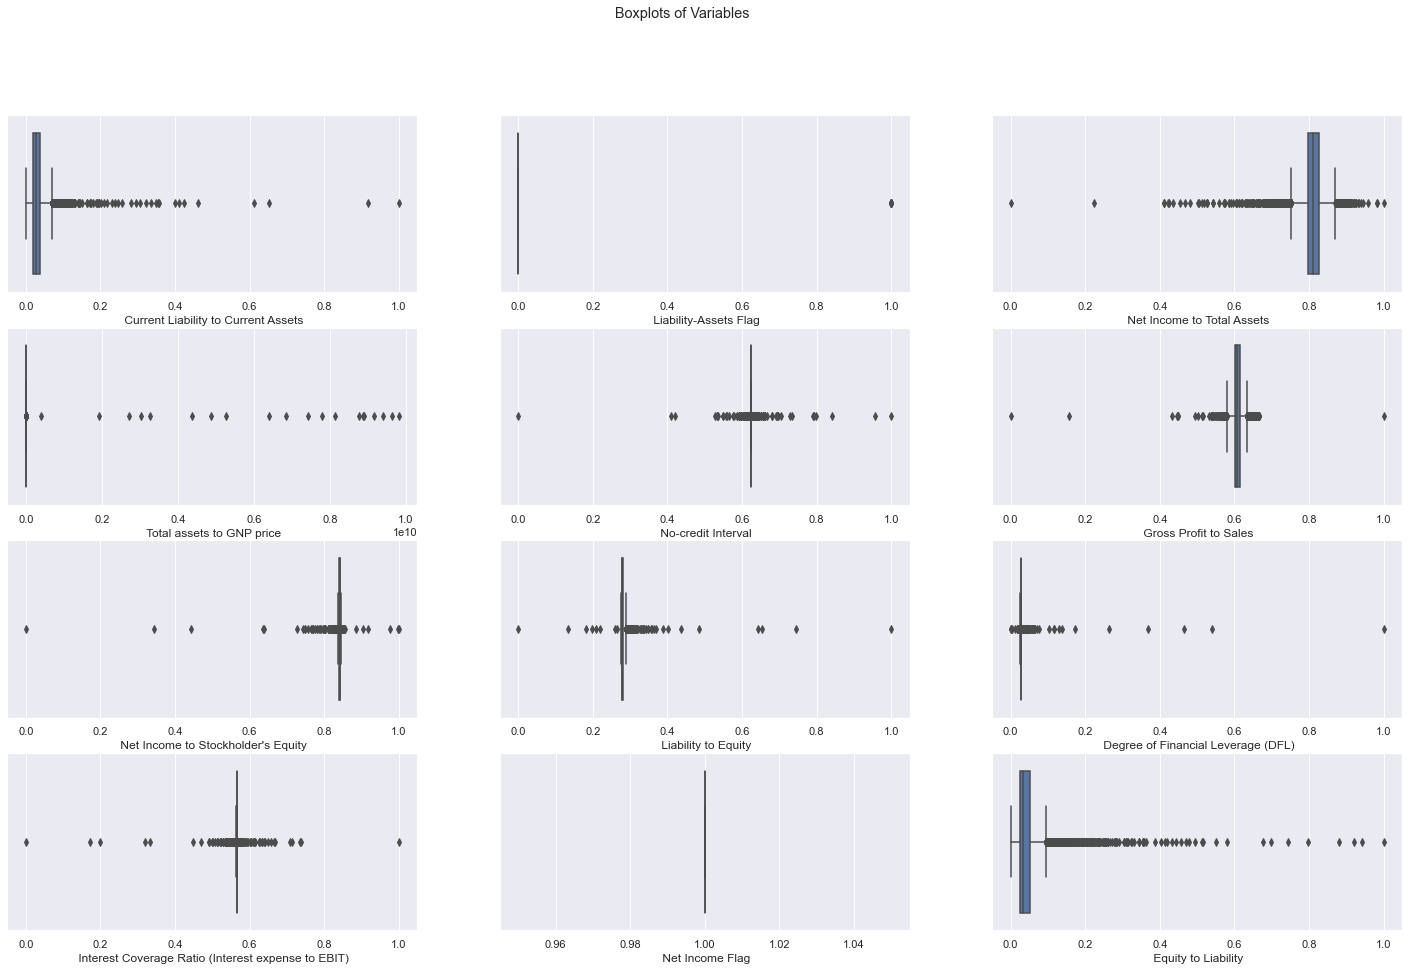

In [37]:
plot_boxplots(84)

**Insights:** For almost all boxplots, outliers are very common. We can either remove these outliers, or perform a transformation for variables that have high skewness. Let's edit our boxplot function definition so that we can log transform particular variables.

In [38]:
trans_lst = []
def plot_boxplots(idx, df=data):
    """
    Log transforms variables with high skewness. 
    Saves the variable names that should undergo a transformation to a list for future transformation.
    Creates a boxplot grid for variables of interest from the data set with the differentiating class as "Bankrupt?". 
    
    Inputs:
        idx: int, the starting index
        
    Outputs:
        Histogram grid for variables of interest.
        trans_lst: a list containing column names that should undergo a log transformation
    """
    fig, axes = plt.subplots(4, 3, figsize=(25, 15))
    fig.suptitle('Boxplots of Variables')
    df_cols = df.columns.to_list()
    for i in np.arange(0, 4):
        for j in np.arange(0, 3):
            # We only have a total of 96 columns
            trans = False
            if idx >= 96:
                return trans_list
            col = df_cols[idx]
            skew = df[col].skew()
            if skew > 0.5 or skew < -0.5:
                col_data = np.log1p(df[col])
                trans_lst.append(col)
                trans = True
            else:
                col_data = np.array(df[col].tolist())
            
            sns.boxplot(ax=axes[i,j], x=col_data, data=df)
            if trans:
                axes[i,j].set_xlabel("Transformed" + col)
            else:
                axes[i,j].set_xlabel(col)
            idx += 1
    plt.show()

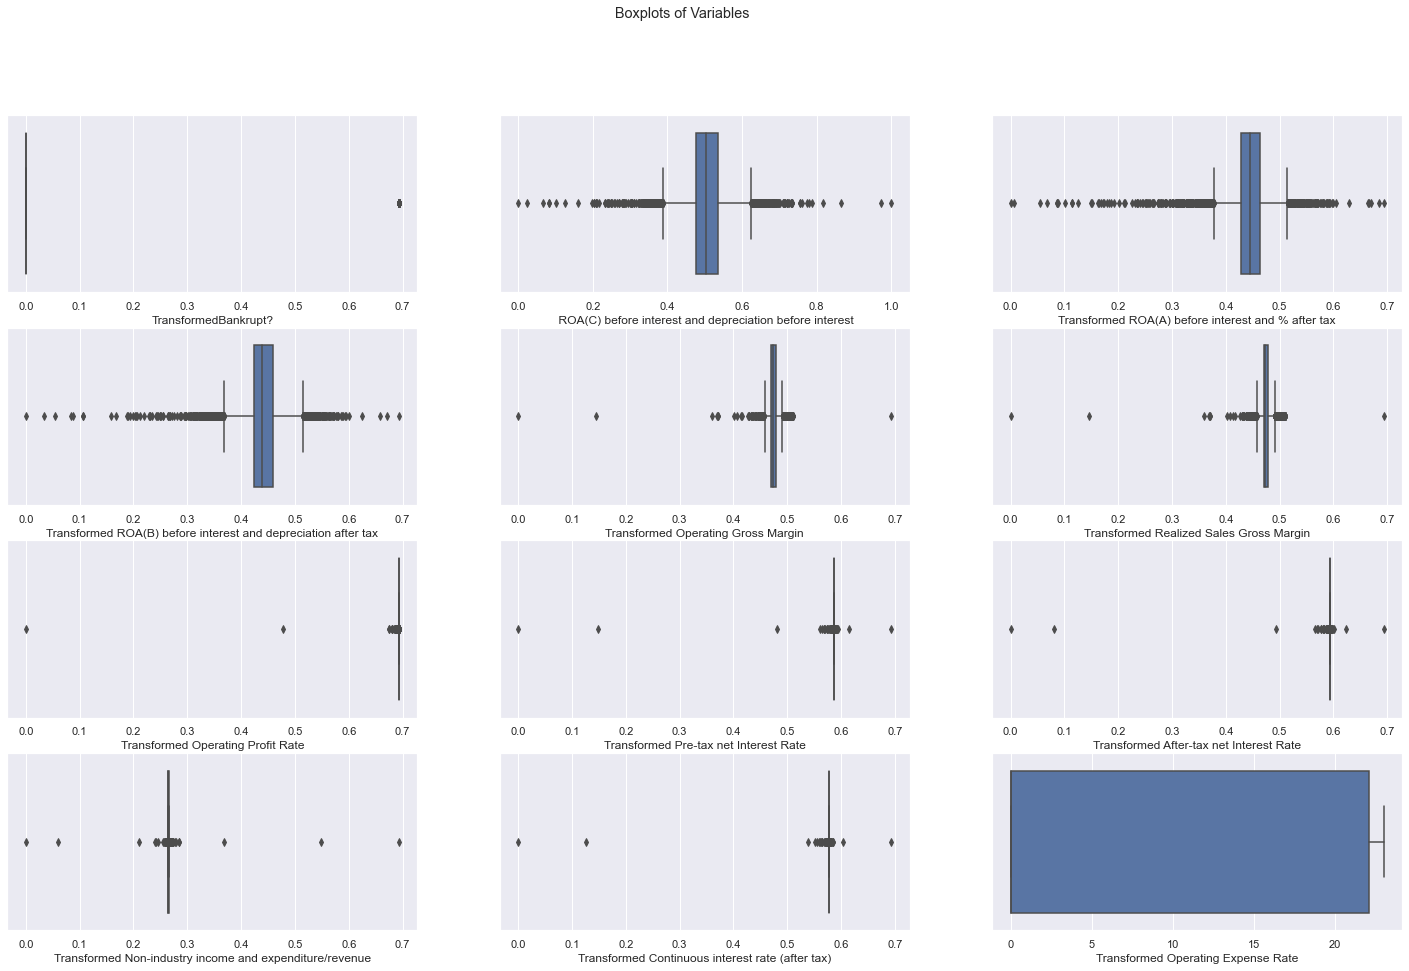

In [39]:
plot_boxplots(0)

**Insights:** Just from plotting the first 12 variables, we see that all of the variables had to be transformed. However, there is still skewness even after transformation, such as for the variable `Operating Profit Rate`. Outliers are still highly present as well. Before attempting to apply any log transformation on the data, I will first attempt to train the ML models on standardized data.

## SMOTE: Solving the Unbalanced Data Issue
Earlier, we saw that the variable `Bankrupt?` was heavily imbalanced. In the entire data set, only 3.23% of companies are bankrupt.    

When looking up how this issue can be solved, I fell upon `SMOTE`, which stands for Synthetic Minority Oversampling. It is a technique used to increase the number of less presented cases in a data set used for machine learning. This is a better way to increase the number of cases than to simply duplicate existing cases. Because the percentage of bankrupt companies is so small, this is absolutely necessary to classify **well.** We could easily create a 0-only classification model, leading to high accuracy, but that defeats the purpose of creating an ML model that can actually be deployed.    

Before applying SMOTE to the data set, we will have to standardize and split our data into train and test sets to prevent data leakage.

In [40]:
# splitting up the target variable and feature variables
X = data.iloc[:, 1:]
y = data.iloc[:, :1]

# standardizing feature data ONLY
sc = StandardScaler()
X_stand = sc.fit_transform(X)
X_stand = pd.DataFrame(X_stand, columns=X.columns.tolist())
X_stand.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,-2.217909,-2.045798,-2.400361,-0.383334,-0.382638,0.016456,-0.023516,-0.020165,-0.087479,-0.031281,...,-2.254317,-0.049491,-0.084274,-0.383465,-0.861611,0.680171,-0.060031,-0.098978,0.0,-0.622067
1,-0.673828,-0.311068,-0.598450,0.135068,0.136307,0.014671,0.014799,0.015966,-0.005957,0.009823,...,-0.309033,-0.049491,-0.021388,0.135253,-0.029804,0.240685,15.129816,0.364559,0.0,-0.535573
2,-1.303672,-0.908420,-1.319910,-0.383759,-0.388177,0.007858,-0.061111,-0.051183,-0.142238,-0.086566,...,-0.820510,-0.049491,-0.005984,-0.383698,-0.249820,0.679247,-0.062961,-0.125015,0.0,-0.621960
3,-1.735886,-1.636209,-1.556340,-1.441418,-1.441832,-0.004257,-0.017313,-0.008676,-0.024491,-0.011077,...,-1.691222,-0.049491,-0.080226,-1.441526,-0.392864,0.093765,-0.053903,-0.052562,0.0,-0.471826
4,-0.661778,-0.307745,-0.508050,-0.541238,-0.540708,0.016758,0.013703,0.016186,-0.013254,0.013300,...,-0.316008,-0.049491,-0.032052,-0.541255,-0.029564,-0.128014,-0.178037,0.776395,0.0,-0.241715


In [41]:
# Only allowing 20% of the data go into testing by requirement
X_train, X_test, y_train, y_test = train_test_split(X_stand, y, test_size=0.2, random_state=42) # for reproducibility

smote_trans = SMOTE()
X_train, y_train = smote_trans.fit_resample(X_train, y_train)

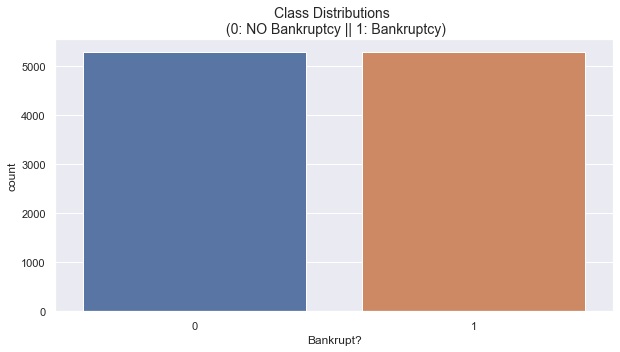

In [42]:
# visualize the countplot after applying SMOTE for Bankrupt? target variable
plt.figure(figsize = (10,5))
sns.countplot(x="Bankrupt?", data=y_train)
plt.title('Class Distributions \n (0: NO Bankruptcy || 1: Bankruptcy)', fontsize=14)
plt.show()

**Insights:** We can see that the SMOTE transformation worked. This provides a more leveled distribution between the two classes.

## Feature Selection
I am performing PCA so I can select the best variables for our model and to prevent overfitting by using all of our variables. The first step is to standardize the data to input into PCA(), but we already did that above. So, we are good to go!

In [43]:
pca = PCA(n_components=len(X_train.columns.tolist()))
X_pca = pca.fit_transform(X_train)
explained_variance = pca.explained_variance_ratio_

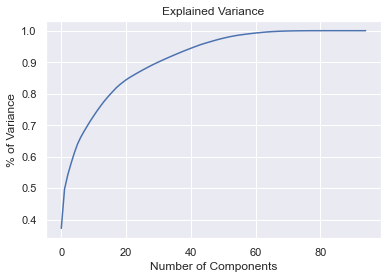

In [44]:
plt.figure()
plt.plot(np.cumsum(explained_variance))
plt.xlabel("Number of Components")
plt.ylabel("% of Variance")
plt.title("Explained Variance")
plt.show()

**Insights:** After performing PCA, we see that with 20 features, we can explain roughly 85% of the data. I think I would try to use 30 features since it explains 90% of the data.

Now we need to figure out which of these columns are the ones contributing the most to `Bankrupt?`.

In [45]:
def create_feature_matrix(pca_num, train, test):
    """
    Creates our feature matrix for our regression models based on how many features we would like to include.
    
    Inputs:
        pca_num: int, how many features we want in our feature matrix
        train: X_train
        test: X_test
        
    Outputs:
        X: our feature matrix for training our models
        y: our test set that only contains the same features as X
    """
    # creating a df sorted by variance explained squared to select our top pca_num features
    pca_df = pd.concat([pd.DataFrame(data={"Features": train.columns.tolist()}), 
                   pd.DataFrame(data={"Variance Squared": explained_variance**2})], 
                   axis=1).sort_values(by="Variance Squared", ascending=False)[0:pca_num]
    
    print()
    print(pca_df.head())
    
    # How much of the variance we are explaining with pca_df
    var_sum = np.sqrt(pca_df["Variance Squared"]).sum()
    print(f"\nVariance explained w/ {pca_num} selected features: {var_sum}")
    
    # creating the feature matrix based on top pca_num features that explain the most variance
    pca_features = pca_df["Features"].tolist()
    
    ## splitting our edited train and test sets
    # our edited train set
    X_train = train.loc[:, pca_features]

    # our edited test set
    X_test = test.loc[:, pca_features]
    
    return (X_train, X_test)

In [46]:
X_train, X_test = create_feature_matrix(30, X_train, X_test)
y_train, y_test = np.array(y_train["Bankrupt?"].tolist()), np.array(y_test["Bankrupt?"].tolist())


                                            Features  Variance Squared
0   ROA(C) before interest and depreciation befor...          0.138392
1             ROA(A) before interest and % after tax          0.015514
2   ROA(B) before interest and depreciation after...          0.002060
3                             Operating Gross Margin          0.001281
4                        Realized Sales Gross Margin          0.001097

Variance explained w/ 30 selected features: 0.8956143152262968


## First ML Model: Logistic Regression
Great, we've already scaled our X data and have performed PCA to select the best features for our model. Because all variables are numerical, there is no need to create dummy variables, and we can go into modeling.  

We'll first fit a logistic regression model. This is a classic model used in ML for classification. `Logistic Regression` assumes:  
- That the target variable is binary  
    - Our target variable `Bankrupt?` satisfies this  
- No extreme outliers  
    - This is something I'd have to work on because based on the visualizations, we saw most of our variables had many outliers. When trying to remove outliers from the data, I was left with a very small data set. Thus, I am going to try to fit the data to the model as is.
- The sample size is sufficiently large
    - This is satisfied by applying SMOTE to balance out the data that corresponds with our target variable

In [47]:
# Instantiate a logistic regression classifier: model
# Had to increase max_iter to 200 to converge
model = LogisticRegression(random_state=42, max_iter=200)

# Fit it to the data
model.fit(X_train, y_train)

# Predicting on both y_train and y_test
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#### Logistic Regression: Evaluation for Train Set

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      5286
           1       0.86      0.85      0.85      5286

    accuracy                           0.85     10572
   macro avg       0.85      0.85      0.85     10572
weighted avg       0.85      0.85      0.85     10572

Accuracy: 0.8520620506999622


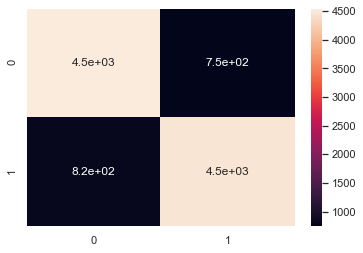

In [48]:
print(classification_report(y_train, y_train_pred))
print(f"Accuracy: {accuracy_score(y_train_pred, y_train)}")
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True);

#### Logistic Regression: Evaluation for Test Set

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1313
           1       0.17      0.75      0.28        51

    accuracy                           0.86      1364
   macro avg       0.58      0.80      0.60      1364
weighted avg       0.96      0.86      0.90      1364

Accuracy: 0.8577712609970675


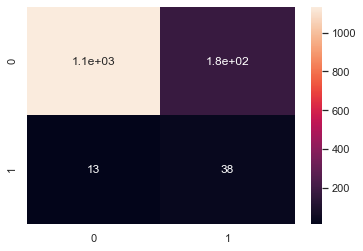

In [49]:
print(classification_report(y_test, y_test_pred))
print(f"Accuracy: {accuracy_score(y_test_pred, y_test)}")
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True);

#### Logistic Regression: Graphing ROC Curves

Logistic Regression AUC is 0.8722


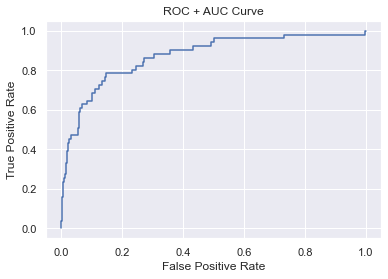

In [50]:
# define metrics
y_test_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
auc = roc_auc_score(y_test, y_test_pred_proba)

# print auc
print(f"Logistic Regression AUC is {round(auc, 4)}")

# create ROC curve
plt.plot(fpr, tpr, label="ROC")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC + AUC Curve")
plt.show()

**Insights:** What I want to answer:  
- What do the precision, recall, and f1-score tell us?  
    - Train Set  
        - Accuracy is relatively high (0.86). This means that our model got 86% of our predictions correctly, regardless of what we are classifying.
        - Precision is relatively high (0.85) for both classes, making the weighted average also the same. This means that there are a relatively low number of **false positives**. This means that when our model predicts a company is bankrupt, it is correct 85% of the time.
        - Recall is relatively high (0.85) for both classes, making the weighted average also the same. This means that there are a relatively low number of **false negatives**. Our model correctly identifies 85% of all bankrupt companies.  
        - F1-Score is relatively high (0.85) since both precision and recall are also 0.85. This indicates that Logistic Regression is doing well in modeling, but I believe this value could be higher.
    - Test Set  
        - Accuracy is relatively high (0.86), which is the same on the training set. This indicates that at least we are not overfitting and our model performs relatively well on unseen data.
        - Weighted average precision is high (0.96). Overall, when our model predicts a company is bankrupt, it is correct 96% of the time.
        - Weighted average recall is relatively high (0.86). This means that of the companies that are actually bankrupt, we only correctly identified them 86% of the time.
        - Weighted F1 score tells us that there is a high value for harmonic mean (0.90), meaning our model is performing well when we take the number of each class that exists into consideration (meaning we consider that our test set has minimal bankrupt companies compared to the train set). 
- What does the AUC tell us?  
    - The closer AUC is to 1, the better the model. A model with an AUC equal to 0.5 is no better than a model that makes random classifications. Our Logistic Regression model has an AUC of 0.8738, which is a pretty good value given that this is our very first model.
- Did this model perform well?
    - Overall, our model does perform well. This is told by our weighted metrics for accuracy, precision, recall, and the F1 score. Logistic Regression would be a good model to use.

## Second ML Model: Naive Bayes
Now we can fit a Naive Bayes model. This model assumes the following:  
- Each feature makes an independent and equal contribution to the outcome.  
    - This is likely going to fail me when building the model since I did not remove outliers. Something I would do to improve the model down the line is to remove collinear variables based on correlogram.

In [51]:
# Instantiate a Naive Bayes classifier: model
model = GaussianNB()

# Fit it to the data
model.fit(X_train, y_train)

# Predicting on both y_train and y_test
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#### Naive Bayes: Evaluation for Train Set

              precision    recall  f1-score   support

           0       0.87      0.16      0.26      5286
           1       0.54      0.98      0.69      5286

    accuracy                           0.57     10572
   macro avg       0.70      0.57      0.48     10572
weighted avg       0.70      0.57      0.48     10572

Accuracy: 0.5657396897465002


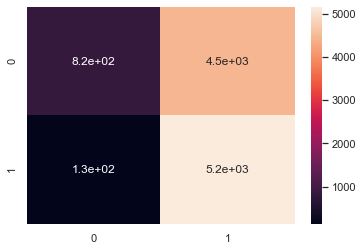

In [52]:
print(classification_report(y_train, y_train_pred))
print(f"Accuracy: {accuracy_score(y_train_pred, y_train)}")
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True);

#### Naive Bayes: Evaluation for Test Set

              precision    recall  f1-score   support

           0       0.98      0.15      0.26      1313
           1       0.04      0.92      0.08        51

    accuracy                           0.18      1364
   macro avg       0.51      0.54      0.17      1364
weighted avg       0.94      0.18      0.25      1364

Accuracy: 0.17888563049853373


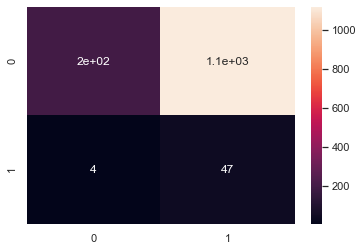

In [53]:
print(classification_report(y_test, y_test_pred))
print(f"Accuracy: {accuracy_score(y_test_pred, y_test)}")
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True);

#### Naive Bayes: Graphing ROC Curves

Naive Bayes AUC is 0.8011


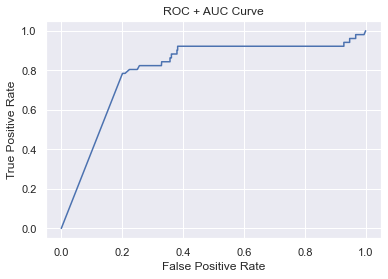

In [54]:
# define metrics
y_test_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
auc = roc_auc_score(y_test, y_test_pred_proba)

# print auc
print(f"Naive Bayes AUC is {round(auc, 4)}")

# create ROC curve
plt.plot(fpr, tpr, label="ROC")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC + AUC Curve")
plt.show()

**Insights:** What I want to answer:  
- What do the precision, recall, and f1-score tell us?  
    - Train Set  
        - Accuracy is low (0.56). This means that our model got 56% of our predictions correctly, regardless of what we are classifying. This metric itself indicates that **Naive Bayes performs poorly for our data set**. 
        - Precision is average (0.70), regardless of what we are classifying. This means that there are a relatively high number of **false positives**. This means that when our model predicts a company is bankrupt, it is correct 70% of the time. When attempting to classify 1, the precision is lower than logistic regression, which also indicates that Naive Bayes is not doing well.   
        - Recall is low (0.56), regardless of what we are classifying. It is even lower when classifying 0 (0.15). This means that there are a high number of **false negatives**. Our model correctly identifies 56% of all bankrupt companies.  
        - F1-Score is low (0.46), regardless of what we are classifying. It is low because both precision and recall are low values compared to our Logistic Regression model. This strongly indicates that Naive Bayes is not a good performing model, even on our train set. We can expect it to perform worse on our test set. 
    - Test Set  
        - Accuracy is extremely low (0.18), The extremely large difference in accuracy can indicate either overfitting or overall poor model performance. 
        - Weighted average precision is high (0.94), but we can see that the precision for classifying a 1 is extremely low (0.04). This means that there are a **high number of false positives** when we attempt to classify a 1 on the test set. Overall, when our model predicts a company is bankrupt, it is correct 94% of the time. I would think that the weighted average would be a good indicator that the model performs somewhat well (ignoring the accuracy), but the 0.04 value is extremely concerning. 
        - Weighted average recall is very low (0.18). This means there are a **high number of false negatives** or **low number of true positives**; either way, this is a terrible recall number. This means that of the companies that are actually bankrupt, we only correctly identified them 18% of the time.
        - Weighted F1 score tells us that there is a low value for harmonic mean (0.25), meaning our model is performing extremely poorly when we take the number of each class that exists into consideration (meaning we consider that our test set has minimal bankrupt companies compared to the train set). 
- What does the AUC tell us?  
    - The closer AUC is to 1, the better the model. A model with an AUC equal to 0.5 is no better than a model that makes random classifications. Our Naive Bayes model has an AUC of 0.7914, which is lower than our Logistic Regression model. This means that this model is doing the worst thus far. We can at least conclude that this model performs better than when we classify randomly.
- Did this model perform well?
    - Overall, our model does NOT perform well. This is told by our weighted metrics for accuracy, precision, recall, and the F1 score. We should not use Naive Bayes for our data. 

## Third ML Model: SVM
I could not find much information on the model's assumptions because SVM does not have assumptions, so I will instead list some major pros and cons of using this model:  
- Pros  
    - Does not get influenced by outliers  
    - No assumptions made of the datasets  
    - High stability due to dependency on support vectors and not the data points
- Cons  
    - Blackbox method: no idea how the model works in detail  
    - Inclined to overfitting method  
    - Very rigorous computation

### scikit-learn SVC model
We will first start with a basic model of SVC, and later perform hyperparameter tuning to see how the model compares.

In [55]:
# Instantiate a Support Vector Classifier: model
# random_state for reproducibility
# probability=True for generating ROC curves later
model = SVC(random_state=42, probability=True) 

# Fit it to the data
model.fit(X_train, y_train)

# Predicting on both y_train and y_test
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#### SVC: Evaluation for Train Set

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      5286
           1       0.88      0.95      0.91      5286

    accuracy                           0.91     10572
   macro avg       0.91      0.91      0.91     10572
weighted avg       0.91      0.91      0.91     10572

Accuracy: 0.9104237608777904


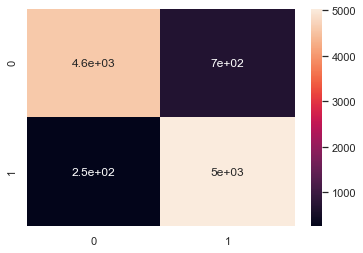

In [56]:
print(classification_report(y_train, y_train_pred))
print(f"Accuracy: {accuracy_score(y_train_pred, y_train)}")
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True);

#### SVC: Evaluation for Test Set

              precision    recall  f1-score   support

           0       0.99      0.87      0.93      1313
           1       0.18      0.76      0.30        51

    accuracy                           0.87      1364
   macro avg       0.59      0.82      0.61      1364
weighted avg       0.96      0.87      0.90      1364

Accuracy: 0.8651026392961877


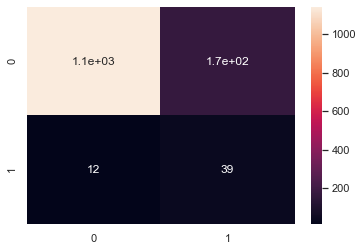

In [57]:
print(classification_report(y_test, y_test_pred))
print(f"Accuracy: {accuracy_score(y_test_pred, y_test)}")
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True);

#### SVC: Graphing ROC Curves

SVC AUC is 0.884


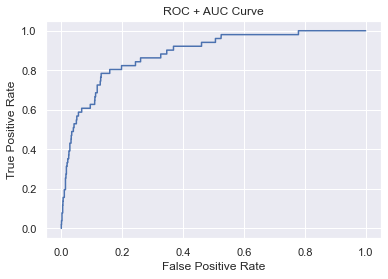

In [58]:
# define metrics
y_test_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
auc = roc_auc_score(y_test, y_test_pred_proba)

# print auc
print(f"SVC AUC is {round(auc, 4)}")

# create ROC curve
plt.plot(fpr, tpr, label="ROC")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC + AUC Curve")
plt.show()

**Insights:** What I want to answer:  
- What do the precision, recall, and f1-score tell us?  
    - Train Set  
        - Accuracy is high (0.91). This means that our model got 91% of our predictions correctly, regardless of what we are classifying. 
        - Precision is high (0.91), regardless of what we are classifying. This means that there are a low number of **false positives**. This means that when our model predicts a company is bankrupt, it is correct 91% of the time.  
        - Recall is high (0.91), regardless of what we are classifying. This means that there are a low number of **false negatives**. Our model correctly identifies 91% of all bankrupt companies.  
        - F1-Score is high (0.91), regardless of what we are classifying. It is high because our precision and recall are both high. If one of precision or recall was very low, then the F1 score emphasizes the lowest value and would decrease. The harmonic mean is defined as the reciprocal of the arithmetic mean of the reciprocals. Because of that, the result is not sensitive to extremely large values. On the other hand, not all outliers are ignored. Extremely low values have a significant influence on the result.
    - Test Set  
        - Accuracy is high, but lower than the accuracy on the train set, as expected (0.87). However, it's a good sign that it is not a dramatic difference. 
        - Weighted average precision is high (0.96), but we can see that the precision for classifying a 1 is extremely low (0.19). This means that there are a **high number of false positives** when we attempt to classify a 1 on the test set. Overall, when our model predicts a company is bankrupt, it is correct 96% of the time. I think we should look at the weighted average and be happy with this. The 0.19 value is concerning, but it is likely low because our test set has very few companies that are truly bankrupt (51), and we classified many false positives (roughly 160). There is a tradeoff between precision and recall that we have to decide on. 
        - Recall is pretty high, regardless of what we are classifying. There is no extreme low value for either class (0 or 1). The weighted average for recall is 0.87, meaning there are a **low number of false negatives**, even when we are trying to predict 1 specifically. This means that when a company is bankrupt, we are not attempting to wrongly classify that it is NOT bankrupt most of the time.  
        - Weighted F1 score tells us that there is a high value for harmonic mean (0.91), meaning our model is performing pretty well when we take the number of each class that exists into consideration (meaning we consider that our test set has minimal bankrupt companies compared to the train set). The F1 score for 0 classification is very high, but the F1 score for 1 classification is very low (0.31). This is because our precision for class 1 is very low, so the F1 score is highlighting this.
- What does the AUC tell us?  
    - The closer AUC is to 1, the better the model. A model with an AUC equal to 0.5 is no better than a model that makes random classifications. Our SVC model has an AUC of 0.8864, which is higher than our previous models (Logistic Regression and Naive Bayes). This means that this model is doing the best thus far.
- Did this model perform well?
    - Overall, our model does perform well. This is told by our weighted metrics for accuracy, precision, recall, and the F1 score. On the test set, the struggle is that there are not many companies that are ACTUALLY bankrupt compared to our train set. 

### scikit-learn SVC model w/ Hyperparameter Tuning
Now we can use GridSearchCV to optimize the parameters and potentially achieve better-scoring metrics.

In [59]:
# set up hyperparameter grid
# C = np.arange(0.1, 3.4, 0.3)
kernel = ["linear", "poly", "rbf", "sigmoid"]
# degree = np.arange(1, 5)
shrinking = [True, False]

# param_grid = {"C": C, "kernel": kernel, "degree": degree} #, "shrinking": shrinking}
param_grid = {"kernel": kernel, "shrinking": shrinking}

# Instantiate a Support Vector Classifier: model
# random_state for reproducibility
# probability=True for generating ROC curves later
model = SVC(random_state=42, probability=True) 

# Instantiate the GridSearchCV object: model_cv
model_cv = GridSearchCV(model, param_grid=param_grid, cv=5)

# Fit it to the data
model_cv.fit(X_train, y_train)

# Print the tuned parameter and score
print(f"\nTuned SVC Parameters: {model_cv.best_params_}")
print(f"Best score is {model_cv.best_score_}")

# Predicting on both y_train and y_test
y_train_pred = model_cv.predict(X_train)
y_test_pred = model_cv.predict(X_test)


Tuned SVC Parameters: {'kernel': 'rbf', 'shrinking': False}
Best score is 0.9028586637322723


#### Tuned SVC: Evaluation for Train Set

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      5286
           1       0.88      0.95      0.91      5286

    accuracy                           0.91     10572
   macro avg       0.91      0.91      0.91     10572
weighted avg       0.91      0.91      0.91     10572

Accuracy: 0.9104237608777904


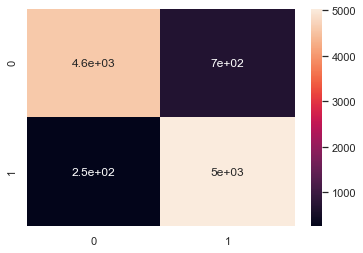

In [60]:
print(classification_report(y_train, y_train_pred))
print(f"Accuracy: {accuracy_score(y_train_pred, y_train)}")
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True);

#### Tuned SVC: Evaluation for Test Set

              precision    recall  f1-score   support

           0       0.99      0.87      0.93      1313
           1       0.18      0.76      0.30        51

    accuracy                           0.87      1364
   macro avg       0.59      0.82      0.61      1364
weighted avg       0.96      0.87      0.90      1364

Accuracy: 0.8651026392961877


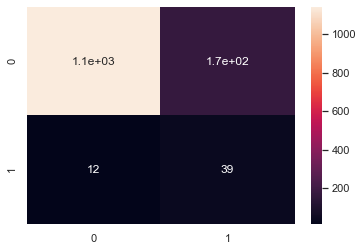

In [61]:
print(classification_report(y_test, y_test_pred))
print(f"Accuracy: {accuracy_score(y_test_pred, y_test)}")
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True);

#### Tuned SVC: Graphing ROC Curves

SVC AUC is 0.884


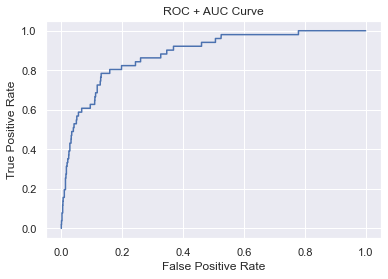

In [62]:
# define metrics
y_test_pred_proba = model_cv.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
auc = roc_auc_score(y_test, y_test_pred_proba)

# print auc
print(f"SVC AUC is {round(auc, 4)}")

# create ROC curve
plt.plot(fpr, tpr, label="ROC")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC + AUC Curve")
plt.show()

**Insights:** On the test set, this performed the same as our non-parametrized model. This means that we can go ahead and use a simple SVC rather than utilizing too much computational power for hyperparameter tuning.

## Redoing our ML Models: Use All Features
I want to see if our feature selection failed us in prediction. I'm going to redo the analyses on only Logistic Regression and SVMs since our Naive Bayes model performed exceptionally poorly, and I assume that it will still perform poorly.

## Logistic Regression w/ All Features

### Retrieving our Original Data

In [63]:
# Only allowing 20% of the data go into testing by requirement
X_train, X_test, y_train, y_test = train_test_split(X_stand, y, test_size=0.2, random_state=42) # for reproducibility

smote_trans = SMOTE()
X_train, y_train = smote_trans.fit_resample(X_train, y_train)

### Ensuring We Correctly Retrieved Original SMOTE Data

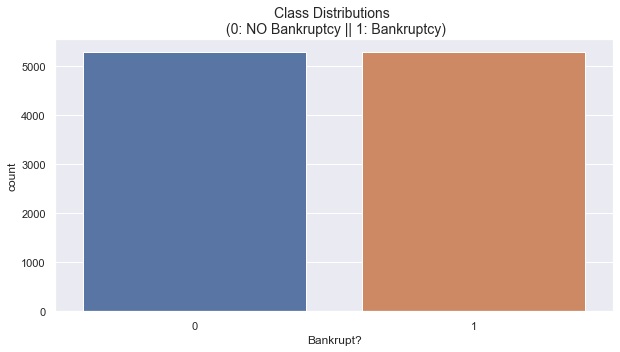

In [64]:
# visualize the countplot after applying SMOTE for Bankrupt? target variable
plt.figure(figsize = (10,5))
sns.countplot(x="Bankrupt?", data=y_train)
plt.title('Class Distributions \n (0: NO Bankruptcy || 1: Bankruptcy)', fontsize=14)
plt.show()

In [65]:
# fix y_train to be an array
y_train = np.array(y_train["Bankrupt?"].tolist())

# Instantiate a logistic regression classifier: model
# Had to increase max_iter to 200 to converge
model = LogisticRegression(random_state=42, max_iter=300)

# Fit it to the data
model.fit(X_train, y_train)

# Predicting on both y_train and y_test
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#### Logistic Regression: Evaluation for Train Set

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      5286
           1       0.89      0.92      0.91      5286

    accuracy                           0.90     10572
   macro avg       0.90      0.90      0.90     10572
weighted avg       0.90      0.90      0.90     10572

Accuracy: 0.9040862656072645


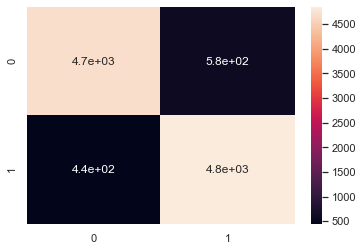

In [66]:
print(classification_report(y_train, y_train_pred))
print(f"Accuracy: {accuracy_score(y_train_pred, y_train)}")
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True);

#### Logistic Regression: Evaluation for Test Set

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1313
           1       0.19      0.73      0.30        51

    accuracy                           0.87      1364
   macro avg       0.59      0.80      0.62      1364
weighted avg       0.96      0.87      0.91      1364

Accuracy: 0.873900293255132


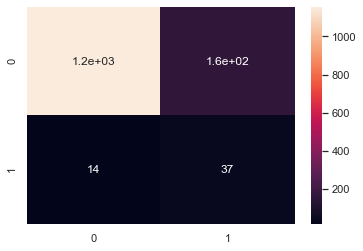

In [67]:
print(classification_report(y_test, y_test_pred))
print(f"Accuracy: {accuracy_score(y_test_pred, y_test)}")
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True);

#### Logistic Regression: Graphing ROC Curves

Logistic Regression AUC is 0.9301


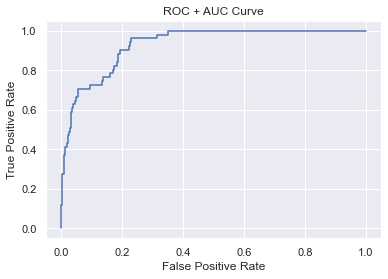

In [68]:
# define metrics
y_test_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
auc = roc_auc_score(y_test, y_test_pred_proba)

# print auc
print(f"Logistic Regression AUC is {round(auc, 4)}")

# create ROC curve
plt.plot(fpr, tpr, label="ROC")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC + AUC Curve")
plt.show()

**Insights:** Comparing this to our first regression model that only had 30 features, this model performed better. Our AUC value improved signficantly (0.8738 vs. 0.9262), and the accuracy, recall, and F1 scores slightly increased. Thus, this model is better.

## SVC w/ All Features

In [69]:
# Instantiate a Support Vector Classifier: model
# random_state for reproducibility
# probability=True for generating ROC curves later
model = SVC(random_state=42, probability=True) 

# Fit it to the data
model.fit(X_train, y_train)

# Predicting on both y_train and y_test
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#### SVC: Evaluation for Train Set

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      5286
           1       0.91      0.98      0.95      5286

    accuracy                           0.94     10572
   macro avg       0.95      0.94      0.94     10572
weighted avg       0.95      0.94      0.94     10572

Accuracy: 0.9433409004918653


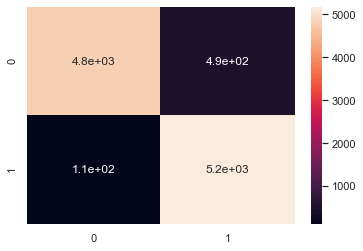

In [70]:
print(classification_report(y_train, y_train_pred))
print(f"Accuracy: {accuracy_score(y_train_pred, y_train)}")
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True);

#### SVC: Evaluation for Test Set

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1313
           1       0.20      0.67      0.30        51

    accuracy                           0.89      1364
   macro avg       0.59      0.78      0.62      1364
weighted avg       0.96      0.89      0.91      1364

Accuracy: 0.8856304985337243


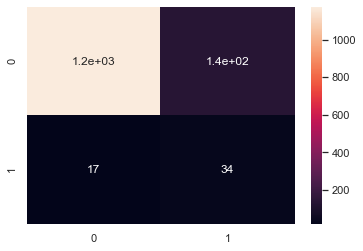

In [71]:
print(classification_report(y_test, y_test_pred))
print(f"Accuracy: {accuracy_score(y_test_pred, y_test)}")
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True);

#### SVC: Graphing ROC Curves

SVC AUC is 0.9083


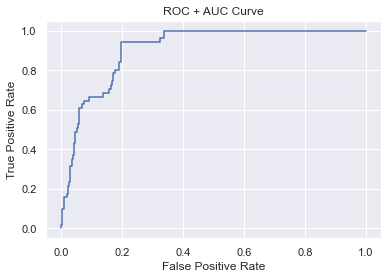

In [72]:
# define metrics
y_test_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
auc = roc_auc_score(y_test, y_test_pred_proba)

# print auc
print(f"SVC AUC is {round(auc, 4)}")

# create ROC curve
plt.plot(fpr, tpr, label="ROC")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC + AUC Curve")
plt.show()

**Insights:** Comparing this to our first simple SVC model, this model also improved by using all features. The AUC value increased (0.887 vs. 0.91), and our accuracy, recall, and F1 scores also increased. However, note that the AUC for this model is smaller than the AUC for our best performing Logistic Regression model.

## Tuned SVC w/ All Features

In [73]:
# set up hyperparameter grid
# C = np.arange(0.1, 3.4, 0.3)
kernel = ["linear", "poly", "rbf", "sigmoid"]
# degree = np.arange(1, 5)
shrinking = [True, False]

# param_grid = {"C": C, "kernel": kernel, "degree": degree} #, "shrinking": shrinking}
param_grid = {"kernel": kernel, "shrinking": shrinking}

# Instantiate a Support Vector Classifier: model
# random_state for reproducibility
# probability=True for generating ROC curves later
model = SVC(random_state=42, probability=True) 

# Instantiate the GridSearchCV object: model_cv
model_cv = GridSearchCV(model, param_grid=param_grid, cv=5)

# Fit it to the data
model_cv.fit(X_train, y_train)

# Print the tuned parameter and score
print(f"\nTuned SVC Parameters: {model_cv.best_params_}")
print(f"Best score is {model_cv.best_score_}")

# Predicting on both y_train and y_test
y_train_pred = model_cv.predict(X_train)
y_test_pred = model_cv.predict(X_test)


Tuned SVC Parameters: {'kernel': 'rbf', 'shrinking': True}
Best score is 0.936342026923963


#### Tuned SVC: Evaluation for Train Set

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      5286
           1       0.91      0.98      0.95      5286

    accuracy                           0.94     10572
   macro avg       0.95      0.94      0.94     10572
weighted avg       0.95      0.94      0.94     10572

Accuracy: 0.9433409004918653


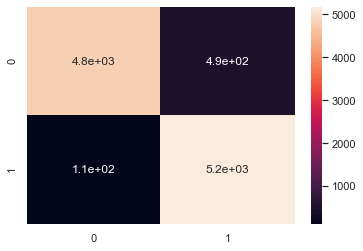

In [74]:
print(classification_report(y_train, y_train_pred))
print(f"Accuracy: {accuracy_score(y_train_pred, y_train)}")
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True);

#### Tuned SVC: Evaluation for Test Set

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1313
           1       0.20      0.67      0.30        51

    accuracy                           0.89      1364
   macro avg       0.59      0.78      0.62      1364
weighted avg       0.96      0.89      0.91      1364

Accuracy: 0.8856304985337243


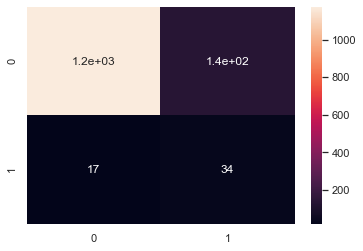

In [75]:
print(classification_report(y_test, y_test_pred))
print(f"Accuracy: {accuracy_score(y_test_pred, y_test)}")
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True);

#### Tuned SVC: Graphing ROC Curves

SVC AUC is 0.9083


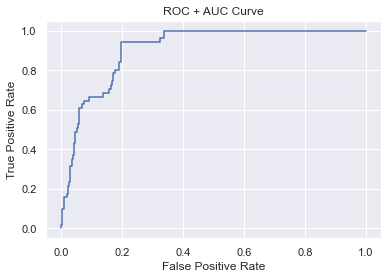

In [76]:
# define metrics
y_test_pred_proba = model_cv.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
auc = roc_auc_score(y_test, y_test_pred_proba)

# print auc
print(f"SVC AUC is {round(auc, 4)}")

# create ROC curve
plt.plot(fpr, tpr, label="ROC")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC + AUC Curve")
plt.show()

**Insights:** The tuned hyperparameters for SVM did not improve much, and the AUC value stayed exactly the same. If I were to choose, I would decide on using the simpler SVC model I used previously on all the features because it takes a lot less computational power and time. 

# Conclusion

The highest accuracy I achieved on the test set is 88% when using the SVM on all features. The weighted average precision, recall, and f1-score are very high, at about 0.9 for each. Thus, I can say with confidence that this model performs well. Between logistic regression and SVMs, I would go with an SVM just because the metrics are better than logistic regression. However, it's important to note that logistic regression may overall perform better than SVMs because of the AUC value (LR: 0.9262; SVM: 0.9074), and all other metrics are almost the same.